## Project Scoping, cleaning and EDA


## - Keeps outliers, log DV

---

### Problem Statement

One of Singapore's leading property web portals PropertyGuru would like to publish a data-driven report on factors affecting home resale prices in Singapore, in a bid to drive website traffic up in the face of competition from other websites like 99co and Stacked Homes. They hope that new property agents will use the report to deepen their understanding of historical market transactions, as well as improve their knowledge and credibility when conversing with potential clients. People looking to buy their first property in Singapore will also be interested in the content, and use it to inform their decisions on where to purchase their desired property. <br>

PropertyGuru is interested to highlight the top factors that most strongly influence property resale prices. Regression models, which are known for their ease of interpretability, are suitable models to determine the predictors of property resale prices in Singapore. <br>

Success to PropertyGuru would be higher brand awareness, an uptick in website traffic after the guide has been posted, and high download rates of the pdf document. 

---

### External Research

Location is a primary consideration when it comes to real estate. The presence and proximity of amenities and lifestyle choices affect property resale prices, and in Singapore the following factors are known to be especially important influencers of property purchase decisions:

- Proximity to quality local schools for young families
- Proximity to workplaces (which explains why property prices have a positive relationship with closeness to the Central Business District)
- Proximity to social, shopping and recreational centres 

These factors are not truly independent of each other. For example, working professionals with young children will not just want access to good schools but also an easy commute to work, and access to shopping centres, affordable food, or recreational services. 

There is also a growing trend of public housing resale prices exceeding SGD 1M in recent years. 2021 saw a record 259 million-dollar HDB resale flats transactions, a stark increase from 82 in 2020. There were a record number of 111 HDB resale flat transactions that breached the million-dollar mark in the third quarter of 2022. 

Source: [Redbrick SG](https://www.redbrick.sg/blog/what-affects-real-estate-prices/) and [ChannelNews Asia](https://www.channelnewsasia.com/singapore/hdb-resale-flat-prices-strong-demand-million-dollar-transactions-property-3030186)

---

### Data Cleaning & EDA

- Read the data dictionary.**
- Determine _what_ missing values mean.
- Figure out what each categorical value represents.
- Identify outliers.
- Consider whether discrete values are better represented as categorical or continuous. (Are relationships to the target linear?)

In [219]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime
import missingno as msno
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [220]:
# Set max views for columns and rows for ease of EDA

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100
pd.set_option('mode.chained_assignment', None)

In [221]:
housing = pd.read_csv('./datasets/train.csv', low_memory=False)
housing.head()

id Tranc_YearMonth             town  flat_type block       street_name  \
0   88471         2016-05  KALLANG/WHAMPOA     4 ROOM    3B  UPP BOON KENG RD   
1  122598         2012-07           BISHAN     5 ROOM   153      BISHAN ST 13   
2  170897         2013-07      BUKIT BATOK  EXECUTIVE  289B    BT BATOK ST 25   
3   86070         2012-04           BISHAN     4 ROOM   232      BISHAN ST 22   
4  153632         2017-12           YISHUN     4 ROOM   876      YISHUN ST 81   

  storey_range  floor_area_sqm  flat_model  lease_commence_date  resale_price  \
0     10 TO 12            90.0     Model A                 2006      680000.0   
1     07 TO 09           130.0    Improved                 1987      665000.0   
2     13 TO 15           144.0   Apartment                 1997      838000.0   
3     01 TO 05           103.0     Model A                 1992      550000.0   
4     01 TO 03            83.0  Simplified                 1987      298000.0   

   Tranc_Year  Tranc_Month  mid_storey  lower  upper  mid  \
0        2016            5          11     10     12   11   
1        2012            7           8      7      9    8   
2        2013            7          14     13     15   14   
3        2012            4           3      1      5    3   
4        2017           12           2      1      3    2   

        full_flat_type               address  floor_area_sqft  price_per_sqft  \
0       4 ROOM Model A  3B, UPP BOON KENG RD          968.760      701.928238   
1      5 ROOM Improved     153, BISHAN ST 13         1399.320      475.230826   
2  EXECUTIVE Apartment  289B, BT BATOK ST 25         1550.016      540.639580   
3       4 ROOM Model A     232, BISHAN ST 22         1108.692      496.080066   
4    4 ROOM Simplified     876, YISHUN ST 81          893.412      333.552717   

   hdb_age  max_floor_lvl  year_completed residential commercial  \
0       15             25            2005           Y          N   
1       34              9            1987           Y          N   
2       24             16            1996           Y          N   
3       29             11            1990           Y          Y   
4       34              4            1987           Y          N   

  market_hawker multistorey_carpark precinct_pavilion  total_dwelling_units  \
0             N                   N                 N                   142   
1             N                   N                 N                   112   
2             N                   N                 N                    90   
3             N                   N                 N                    75   
4             N                   N                 N                    48   

   1room_sold  2room_sold  3room_sold  4room_sold  5room_sold  exec_sold  \
0           0           0           0          96          46          0   
1           0           0           0          56          56          0   
2           0           0           0           0          30         60   
3           0           0           0          68           7          0   
4           0           0           0          30          18          0   

   multigen_sold  studio_apartment_sold  1room_rental  2room_rental  \
0              0                      0             0             0   
1              0                      0             0             0   
2              0                      0             0             0   
3              0                      0             0             0   
4              0                      0             0             0   

   3room_rental  other_room_rental  postal  Latitude   Longitude  \
0             0                  0  382003  1.314299  103.872828   
1             0                  0  570153  1.346086  103.855078   
2             0                  0  651289  1.343867  103.760535   
3             0                  0  570232  1.358245  103.845504   
4             0                  0  760876  1.414745  103.835532   

  

In [222]:
housing.drop(columns = ['price_per_sqft'], inplace = True)

In [223]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 77 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         150634 non-null  int64  
 1   Tranc_YearMonth            150634 non-null  object 
 2   town                       150634 non-null  object 
 3   flat_type                  150634 non-null  object 
 4   block                      150634 non-null  object 
 5   street_name                150634 non-null  object 
 6   storey_range               150634 non-null  object 
 7   floor_area_sqm             150634 non-null  float64
 8   flat_model                 150634 non-null  object 
 9   lease_commence_date        150634 non-null  int64  
 10  resale_price               150634 non-null  float64
 11  Tranc_Year                 150634 non-null  int64  
 12  Tranc_Month                150634 non-null  int64  
 13  mid_storey                 15

In [224]:
# Summary stats

housing.describe(include = 'all')

id Tranc_YearMonth         town flat_type   block  \
count   150634.000000          150634       150634    150634  150634   
unique            NaN             110           26         7    2514   
top               NaN         2018-07  JURONG WEST    4 ROOM       2   
freq              NaN            2088        11451     61136     579   
mean     93047.887496             NaN          NaN       NaN     NaN   
std      53679.906247             NaN          NaN       NaN     NaN   
min          1.000000             NaN          NaN       NaN     NaN   
25%      46469.250000             NaN          NaN       NaN     NaN   
50%      93077.500000             NaN          NaN       NaN     NaN   
75%     139574.750000             NaN          NaN       NaN     NaN   
max     185966.000000             NaN          NaN       NaN     NaN   

           street_name storey_range  floor_area_sqm flat_model  \
count           150634       150634    150634.00000     150634   
unique             553           25             NaN         20   
top     YISHUN RING RD     04 TO 06             NaN    Model A   
freq              2451        34699             NaN      46261   
mean               NaN          NaN        97.19763        NaN   
std                NaN          NaN        24.40304        NaN   
min                NaN          NaN        31.00000        NaN   
25%                NaN          NaN        75.00000        NaN   
50%                NaN          NaN        95.00000        NaN   
75%                NaN          NaN       112.00000        NaN   
max                NaN          NaN       280.00000        NaN   

        lease_commence_date  resale_price     Tranc_Year    Tranc_Month  \
count         150634.000000  1.506340e+05  150634.000000  150634.000000   
unique                  NaN           NaN            NaN            NaN   
top                     NaN           NaN            NaN            NaN   
freq                    NaN           NaN            NaN            NaN   
mean            1992.448464  4.491615e+05    2016.489551       6.580500   
std               12.138829  1.433076e+05       2.752396       3.345468   
min             1966.000000  1.500000e+05    2012.000000       1.000000   
25%             1984.000000  3.470000e+05    2014.000000       4.000000   
50%             1992.000000  4.200000e+05    2017.000000       7.000000   
75%             2001.000000  5.200000e+05    2019.000000       9.000000   
max             2019.000000  1.258000e+06    2021.000000      12.000000   

           mid_storey          lower          upper            mid  \
count   150634.000000  150634.000000  150634.000000  150634.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean         8.284823       7.248370       9.321275       8.284823   
std          5.508074       5.515155       5.507364       5.508074   
min          2.000000       1.000000       3.000000       2.000000   
25%          5.000000       4.000000       6.000000       5.000000   
50%          8.000000       7.000000       9.000000       8.000000   
75%         11.000000      10.000000      12.000000      11.000000   
max         50.000000      49.000000      51.000000      50.000000   

        full_flat_type              address  floor_area_sqft        hdb_age  \
count           150634               150634    150634.000000  150634.000000   
unique              43                 9157              NaN            NaN   
top     4 ROOM Model A  91, TANGLIN HALT RD              NaN            NaN   
freq             35127                  106              NaN            NaN   
mean               NaN                  NaN      1046.235290      28.551536   
std                NaN                  NaN       262.674321      12.138829   
min                NaN                  NaN       333.684000      

In [225]:
# Identifying numerical columns

housing_num = housing.select_dtypes("number")
housing_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 57 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         150634 non-null  int64  
 1   floor_area_sqm             150634 non-null  float64
 2   lease_commence_date        150634 non-null  int64  
 3   resale_price               150634 non-null  float64
 4   Tranc_Year                 150634 non-null  int64  
 5   Tranc_Month                150634 non-null  int64  
 6   mid_storey                 150634 non-null  int64  
 7   lower                      150634 non-null  int64  
 8   upper                      150634 non-null  int64  
 9   mid                        150634 non-null  int64  
 10  floor_area_sqft            150634 non-null  float64
 11  hdb_age                    150634 non-null  int64  
 12  max_floor_lvl              150634 non-null  int64  
 13  year_completed             15

Text(0.5, 1.0, 'Correlation Heatmap of Variables')

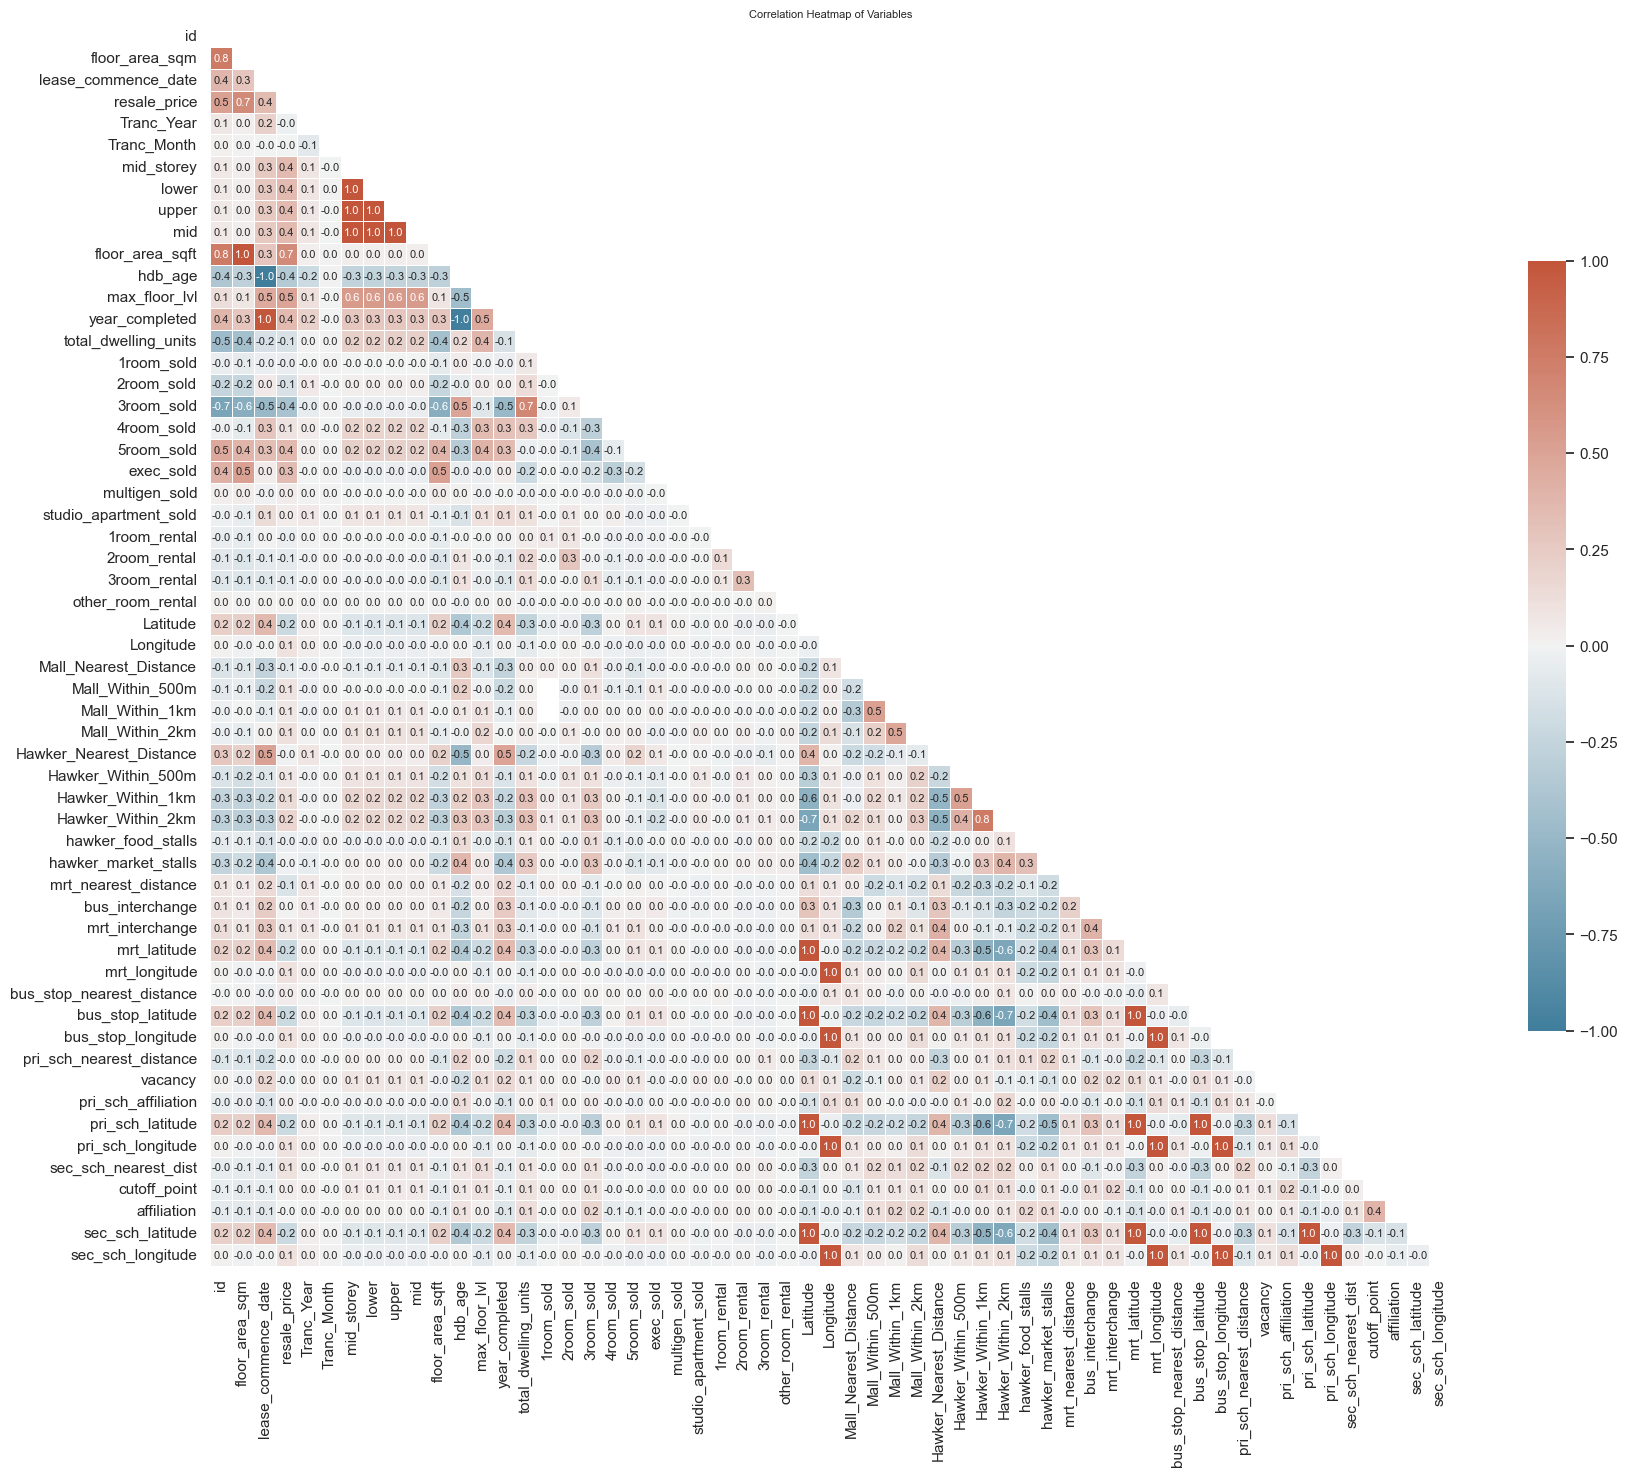

In [226]:
# Correlation of all numerical variables to observe the relationships between them 
# and see if there is multicollinearity between any 2 variables

sns.set_theme(style="white")
corr = housing_num.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(20,20))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, fmt = '.1f',
            square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .5}, annot_kws={"size":8})
plt.title('Correlation Heatmap of Variables', fontsize=8)

In [227]:
# Looking at how the variables correlate with resale price

round(housing[housing.columns[1:]].corr()['resale_price'][:],2)

/var/folders/r9/9246nqp9249ghjl6r9xy_dwr0000gn/T/ipykernel_28895/3809399179.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  round(housing[housing.columns[1:]].corr()['resale_price'][:],2)


floor_area_sqm               0.65
lease_commence_date          0.35
resale_price                 1.00
Tranc_Year                  -0.02
Tranc_Month                 -0.01
mid_storey                   0.35
lower                        0.35
upper                        0.35
mid                          0.35
floor_area_sqft              0.65
hdb_age                     -0.35
max_floor_lvl                0.50
year_completed               0.35
total_dwelling_units        -0.14
1room_sold                  -0.04
2room_sold                  -0.15
3room_sold                  -0.41
4room_sold                   0.09
5room_sold                   0.36
exec_sold                    0.34
multigen_sold                0.04
studio_apartment_sold        0.04
1room_rental                -0.04
2room_rental                -0.08
3room_rental                -0.08
other_room_rental            0.01
Latitude                    -0.22
Longitude                    0.11
Mall_Nearest_Distance       -0.09
Mall_Within_50

### Examining the dependent variable

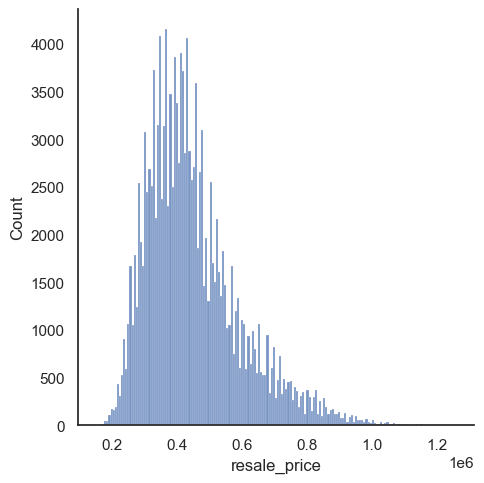

In [228]:
sns.displot(data=housing, x="resale_price")

<AxesSubplot: xlabel='resale_price'>

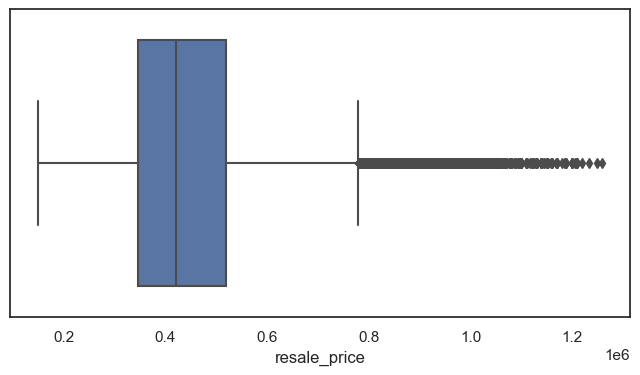

In [229]:
sns.boxplot(data=housing, x="resale_price")

Housing resale price has several outliers above the upper limit of Q3+IQR, but these are likely naturally-occurring true outliers given the rise in million-dollar homes sold in recent years. We'll keep them in for now because we want to be able to predict home prices based on data that reflects the actual scenario in Singapore's housing market, which does include outlier home prices. To better approximate normality, we will apply log-transformation to minimise the dependent variable's skew as best as possible.

In [230]:
# Log transforming the dependent variable to normalise the distribution and reduce the outlier effect 

housing["resale_price_log"] = np.log(housing["resale_price"])

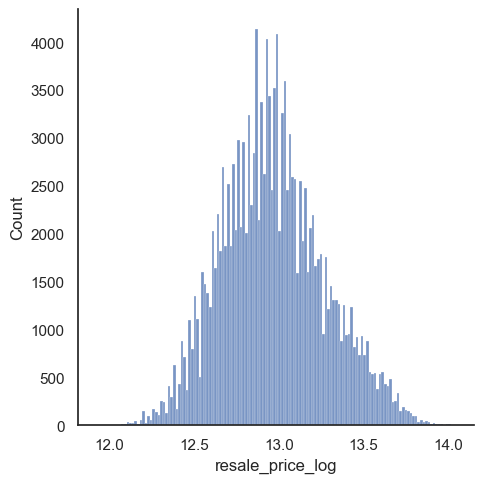

In [231]:
# Looking once again at the distribution of resale price

sns.displot(data=housing, x="resale_price_log")

<AxesSubplot: xlabel='resale_price_log'>

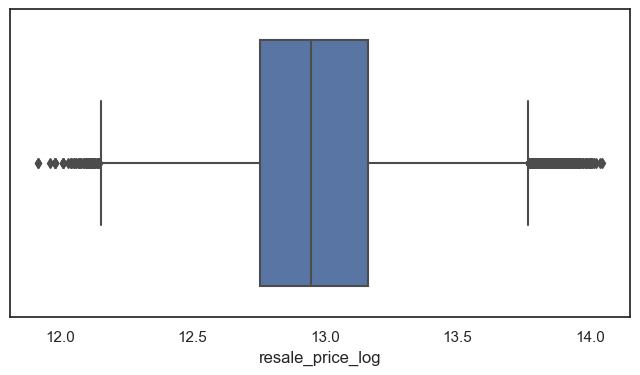

In [232]:
# It resembles a normal curve alot more now, which fulfills an assumption for linear regression.

sns.boxplot(data=housing, x="resale_price_log")

### Checking for Missing Data and handling them

In [233]:
# Checking for columns with null data.

housing.isna().sum()

id                               0
Tranc_YearMonth                  0
town                             0
flat_type                        0
block                            0
street_name                      0
storey_range                     0
floor_area_sqm                   0
flat_model                       0
lease_commence_date              0
resale_price                     0
Tranc_Year                       0
Tranc_Month                      0
mid_storey                       0
lower                            0
upper                            0
mid                              0
full_flat_type                   0
address                          0
floor_area_sqft                  0
hdb_age                          0
max_floor_lvl                    0
year_completed                   0
residential                      0
commercial                       0
market_hawker                    0
multistorey_carpark              0
precinct_pavilion                0
total_dwelling_units

<AxesSubplot: >

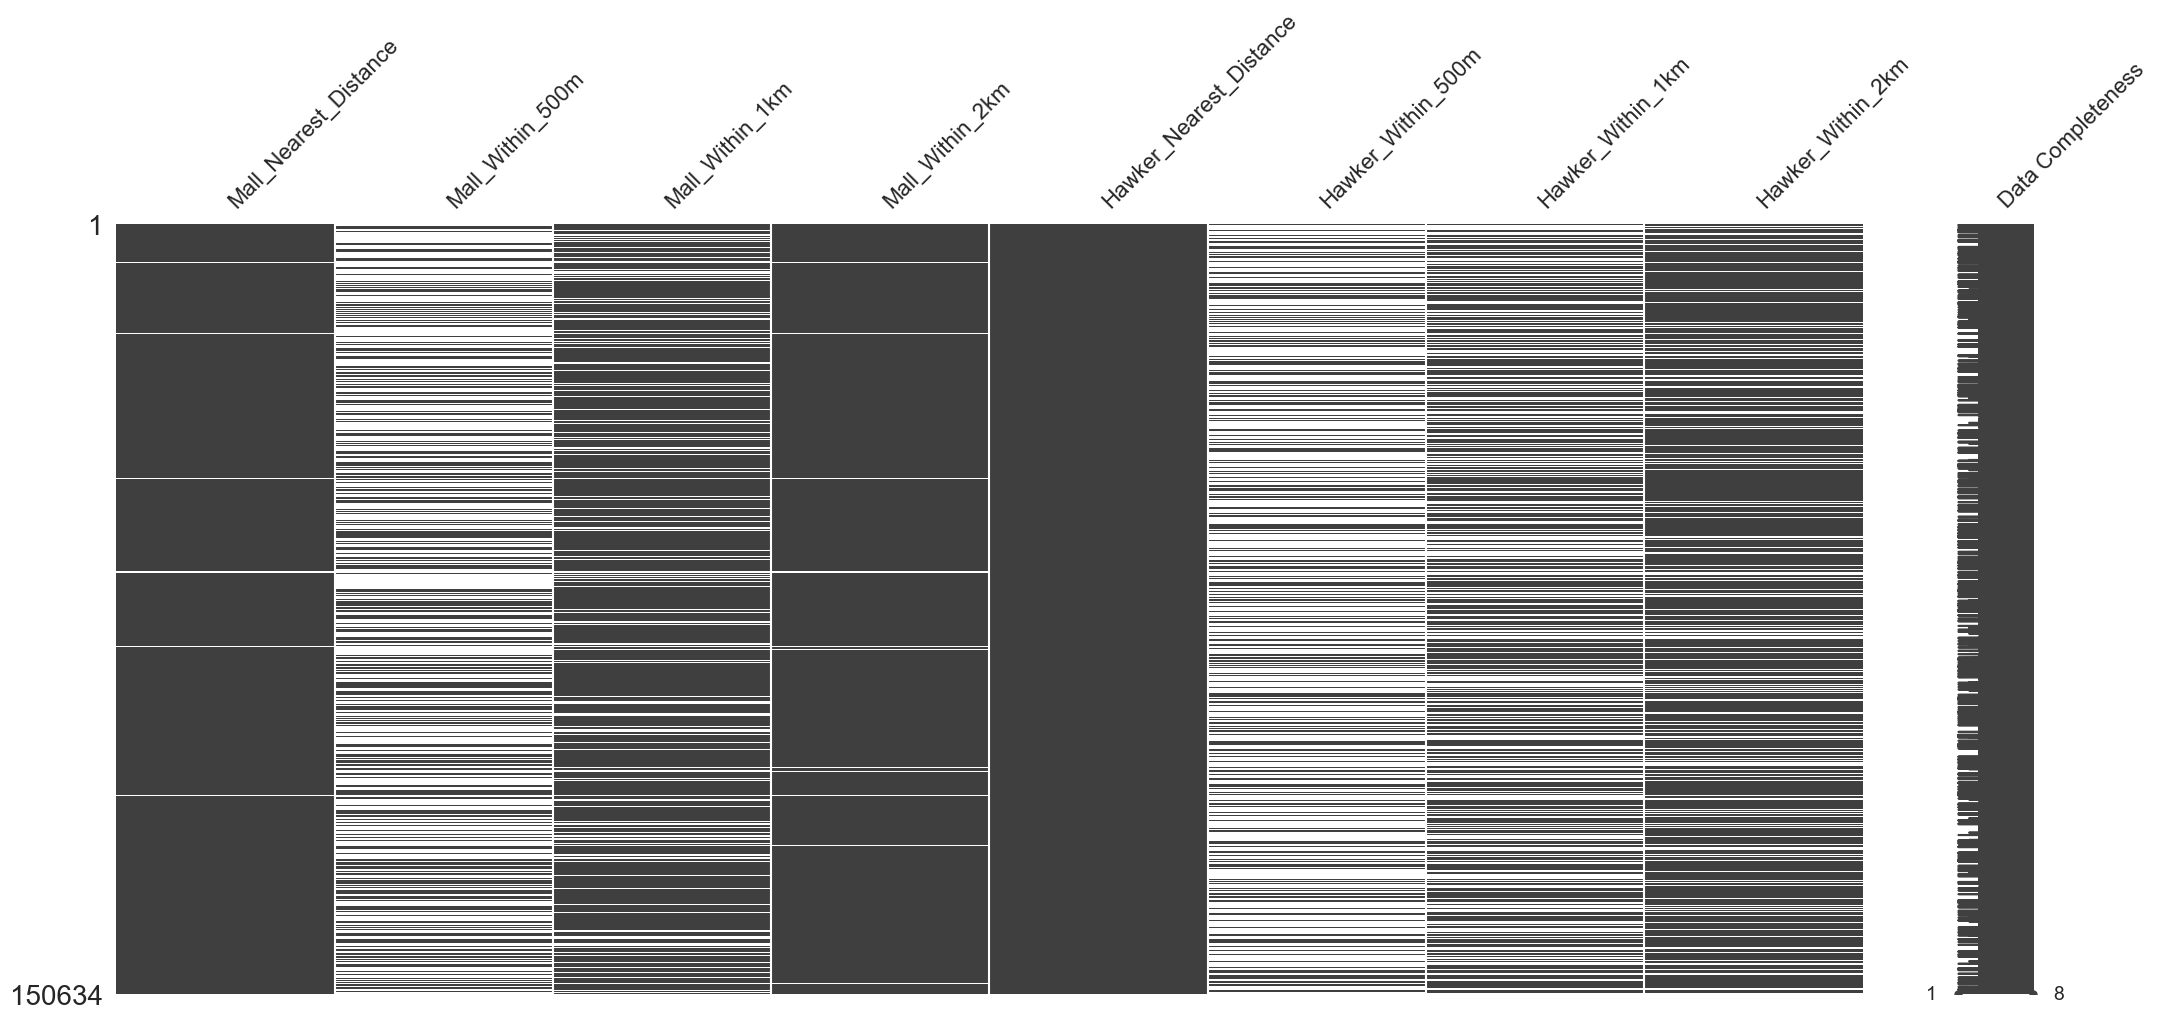

In [234]:
# Visualising missing data in columns with missing data

to_check = housing[['Mall_Nearest_Distance', 'Mall_Within_500m', 'Mall_Within_1km',
       'Mall_Within_2km', 'Hawker_Nearest_Distance', 'Hawker_Within_500m',
       'Hawker_Within_1km', 'Hawker_Within_2km']]

msno.matrix(to_check, labels = True)

There are rows with supposedly 0 mall nearest distance but counts for malls within 500m,# 1km etc. We will drop these rows as the missing values are likely to be due to errors during data collection, since there should be data in the nearest distance column

In [235]:
# Dropping rows

no_mall_distance = housing[(housing['Mall_Nearest_Distance'].isnull()) & 
                           (housing['Mall_Within_500m'].isnull())]
to_drop = no_mall_distance.index
housing.drop(to_drop, inplace = True)

In [236]:
# Should the missing values under the columns on malls within a certain radius have values?

housing[housing['Mall_Within_500m'].isnull() & (housing['Mall_Nearest_Distance'] <= 500)]


Empty DataFrame
Columns: [id, Tranc_YearMonth, town, flat_type, block, street_name, storey_range, floor_area_sqm, flat_model, lease_commence_date, resale_price, Tranc_Year, Tranc_Month, mid_storey, lower, upper, mid, full_flat_type, address, floor_area_sqft, hdb_age, max_floor_lvl, year_completed, residential, commercial, market_hawker, multistorey_carpark, precinct_pavilion, total_dwelling_units, 1room_sold, 2room_sold, 3room_sold, 4room_sold, 5room_sold, exec_sold, multigen_sold, studio_apartment_sold, 1room_rental, 2room_rental, 3room_rental, other_room_rental, postal, Latitude, Longitude, planning_area, Mall_Nearest_Distance, Mall_Within_500m, Mall_Within_1km, Mall_Within_2km, Hawker_Nearest_Distance, Hawker_Within_500m, Hawker_Within_1km, Hawker_Within_2km, hawker_food_stalls, hawker_market_stalls, mrt_nearest_distance, mrt_name, bus_interchange, mrt_interchange, mrt_latitude, mrt_longitude, bus_stop_nearest_distance, bus_stop_name, bus_stop_latitude, bus_stop_longitude, pri_sch_nearest_distance, pri_sch_name, vacancy, pri_sch_affiliation, pri_sch_latitude, pri_sch_longitude, sec_sch_nearest_dist, sec_sch_name, cutoff_point, affiliation, sec_sch_latitude, sec_sch_longitude, resale_price_log]
Index: []

In [237]:
# Should the missing values under the columns on malls within a certain radius have values?
housing[housing['Mall_Within_1km'].isnull() & (housing['Mall_Nearest_Distance'] <= 1000)]


Empty DataFrame
Columns: [id, Tranc_YearMonth, town, flat_type, block, street_name, storey_range, floor_area_sqm, flat_model, lease_commence_date, resale_price, Tranc_Year, Tranc_Month, mid_storey, lower, upper, mid, full_flat_type, address, floor_area_sqft, hdb_age, max_floor_lvl, year_completed, residential, commercial, market_hawker, multistorey_carpark, precinct_pavilion, total_dwelling_units, 1room_sold, 2room_sold, 3room_sold, 4room_sold, 5room_sold, exec_sold, multigen_sold, studio_apartment_sold, 1room_rental, 2room_rental, 3room_rental, other_room_rental, postal, Latitude, Longitude, planning_area, Mall_Nearest_Distance, Mall_Within_500m, Mall_Within_1km, Mall_Within_2km, Hawker_Nearest_Distance, Hawker_Within_500m, Hawker_Within_1km, Hawker_Within_2km, hawker_food_stalls, hawker_market_stalls, mrt_nearest_distance, mrt_name, bus_interchange, mrt_interchange, mrt_latitude, mrt_longitude, bus_stop_nearest_distance, bus_stop_name, bus_stop_latitude, bus_stop_longitude, pri_sch_nearest_distance, pri_sch_name, vacancy, pri_sch_affiliation, pri_sch_latitude, pri_sch_longitude, sec_sch_nearest_dist, sec_sch_name, cutoff_point, affiliation, sec_sch_latitude, sec_sch_longitude, resale_price_log]
Index: []

In [238]:
# Should the missing values under the columns on malls within a certain radius have values?
housing[housing['Mall_Within_2km'].isnull() & (housing['Mall_Nearest_Distance'] <= 2000)]


Empty DataFrame
Columns: [id, Tranc_YearMonth, town, flat_type, block, street_name, storey_range, floor_area_sqm, flat_model, lease_commence_date, resale_price, Tranc_Year, Tranc_Month, mid_storey, lower, upper, mid, full_flat_type, address, floor_area_sqft, hdb_age, max_floor_lvl, year_completed, residential, commercial, market_hawker, multistorey_carpark, precinct_pavilion, total_dwelling_units, 1room_sold, 2room_sold, 3room_sold, 4room_sold, 5room_sold, exec_sold, multigen_sold, studio_apartment_sold, 1room_rental, 2room_rental, 3room_rental, other_room_rental, postal, Latitude, Longitude, planning_area, Mall_Nearest_Distance, Mall_Within_500m, Mall_Within_1km, Mall_Within_2km, Hawker_Nearest_Distance, Hawker_Within_500m, Hawker_Within_1km, Hawker_Within_2km, hawker_food_stalls, hawker_market_stalls, mrt_nearest_distance, mrt_name, bus_interchange, mrt_interchange, mrt_latitude, mrt_longitude, bus_stop_nearest_distance, bus_stop_name, bus_stop_latitude, bus_stop_longitude, pri_sch_nearest_distance, pri_sch_name, vacancy, pri_sch_affiliation, pri_sch_latitude, pri_sch_longitude, sec_sch_nearest_dist, sec_sch_name, cutoff_point, affiliation, sec_sch_latitude, sec_sch_longitude, resale_price_log]
Index: []

In [239]:
# Remaining NaN values can be replaced by 0 as the figures correspond with the nearest distance

housing['Mall_Within_500m'].fillna(0, inplace = True)
housing['Mall_Within_1km'].fillna(0, inplace = True)
housing['Mall_Within_2km'].fillna(0, inplace = True)

In [240]:
# Looking at the missing values for hawker distances, seems to be similar to mall distances:

housing[housing['Hawker_Within_500m'].isnull()]

id Tranc_YearMonth         town         flat_type block  \
1       122598         2012-07       BISHAN            5 ROOM   153   
2       170897         2013-07  BUKIT BATOK         EXECUTIVE  289B   
3        86070         2012-04       BISHAN            4 ROOM   232   
4       153632         2017-12       YISHUN            4 ROOM   876   
6       173300         2018-05      HOUGANG            5 ROOM   641   
...        ...             ...          ...               ...   ...   
150628  162877         2020-07     SENGKANG            5 ROOM  469C   
150629   39814         2020-09    WOODLANDS         EXECUTIVE   849   
150630  147177         2017-06  JURONG WEST            5 ROOM  648D   
150631  179087         2020-12        BEDOK         EXECUTIVE   639   
150633  185947         2018-06       YISHUN  MULTI-GENERATION   666   

               street_name storey_range  floor_area_sqm        flat_model  \
1             BISHAN ST 13     07 TO 09           130.0          Improved   
2           BT BATOK ST 25     13 TO 15           144.0         Apartment   
3             BISHAN ST 22     01 TO 05           103.0           Model A   
4             YISHUN ST 81     01 TO 03            83.0        Simplified   
6            HOUGANG AVE 8     07 TO 09           120.0          Improved   
...                    ...          ...             ...               ...   
150628   SENGKANG WEST WAY     10 TO 12           113.0          Improved   
150629     WOODLANDS ST 82     04 TO 06           161.0         Apartment   
150630   JURONG WEST ST 61     04 TO 06           110.0          Improved   
150631  BEDOK RESERVOIR RD     10 TO 12           144.0         Apartment   
150633        YISHUN AVE 4     07 TO 09           164.0  Multi Generation   

        lease_commence_date  resale_price  Tranc_Year  Tranc_Month  \
1                      1987      665000.0        2012            7   
2                      1997      838000.0        2013            7   
3                      1992      550000.0        2012            4   
4                      1987      298000.0        2017           12   
6                      1987      433000.0        2018            5   
...                     ...           ...         ...          ...   
150628                 2016      555000.0        2020            7   
150629                 1995      625000.0        2020            9   
150630                 2001      455000.0        2017            6   
150631                 1993      733000.0        2020           12   
150633                 1987      765000.0        2018            6   

        mid_storey  lower  upper  mid                     full_flat_type  \
1                8      7      9    8                    5 ROOM Improved   
2               14     13     15   14                EXECUTIVE Apartment   
3                3      1      5    3                     4 ROOM Model A   
4                2      1      3    2                  4 ROOM Simplified   
6                8      7      9    8                    5 ROOM Improved   
...            ...    ...    ...  ...                                ...   
150628          11     10     12   11                    5 ROOM Improved   
150629           5      4      6    5                EXECUTIVE Apartment   
150630           5      4      6    5                    5 ROOM Improved   
150631          11     10     12   11                EXECUTIVE Apartment   
150633           8      7      9    8  MULTI-GENERATION Multi Generation   

                        address  floor_area_sqft  hdb_age  max_floor_lvl  \
1             153, BISHAN ST 13         1399.320       34              9   
2          289B, BT BATOK ST 25         1550.016       24             16   
3             232, BISHAN ST 22         1108.692       29             11   
4             876, YISHUN ST 81          893.412       34              4   
6            641, HOUGANG AVE 8         1291.680       34             17   
...                     

In [241]:
# Should the missing values under the columns on hawker within a certain radius have values?
housing[housing['Hawker_Within_500m'].isnull() & (housing['Hawker_Nearest_Distance'] <= 500)]


Empty DataFrame
Columns: [id, Tranc_YearMonth, town, flat_type, block, street_name, storey_range, floor_area_sqm, flat_model, lease_commence_date, resale_price, Tranc_Year, Tranc_Month, mid_storey, lower, upper, mid, full_flat_type, address, floor_area_sqft, hdb_age, max_floor_lvl, year_completed, residential, commercial, market_hawker, multistorey_carpark, precinct_pavilion, total_dwelling_units, 1room_sold, 2room_sold, 3room_sold, 4room_sold, 5room_sold, exec_sold, multigen_sold, studio_apartment_sold, 1room_rental, 2room_rental, 3room_rental, other_room_rental, postal, Latitude, Longitude, planning_area, Mall_Nearest_Distance, Mall_Within_500m, Mall_Within_1km, Mall_Within_2km, Hawker_Nearest_Distance, Hawker_Within_500m, Hawker_Within_1km, Hawker_Within_2km, hawker_food_stalls, hawker_market_stalls, mrt_nearest_distance, mrt_name, bus_interchange, mrt_interchange, mrt_latitude, mrt_longitude, bus_stop_nearest_distance, bus_stop_name, bus_stop_latitude, bus_stop_longitude, pri_sch_nearest_distance, pri_sch_name, vacancy, pri_sch_affiliation, pri_sch_latitude, pri_sch_longitude, sec_sch_nearest_dist, sec_sch_name, cutoff_point, affiliation, sec_sch_latitude, sec_sch_longitude, resale_price_log]
Index: []

In [242]:
housing[housing['Hawker_Within_1km'].isnull() & (housing['Hawker_Nearest_Distance'] <= 1000)]


Empty DataFrame
Columns: [id, Tranc_YearMonth, town, flat_type, block, street_name, storey_range, floor_area_sqm, flat_model, lease_commence_date, resale_price, Tranc_Year, Tranc_Month, mid_storey, lower, upper, mid, full_flat_type, address, floor_area_sqft, hdb_age, max_floor_lvl, year_completed, residential, commercial, market_hawker, multistorey_carpark, precinct_pavilion, total_dwelling_units, 1room_sold, 2room_sold, 3room_sold, 4room_sold, 5room_sold, exec_sold, multigen_sold, studio_apartment_sold, 1room_rental, 2room_rental, 3room_rental, other_room_rental, postal, Latitude, Longitude, planning_area, Mall_Nearest_Distance, Mall_Within_500m, Mall_Within_1km, Mall_Within_2km, Hawker_Nearest_Distance, Hawker_Within_500m, Hawker_Within_1km, Hawker_Within_2km, hawker_food_stalls, hawker_market_stalls, mrt_nearest_distance, mrt_name, bus_interchange, mrt_interchange, mrt_latitude, mrt_longitude, bus_stop_nearest_distance, bus_stop_name, bus_stop_latitude, bus_stop_longitude, pri_sch_nearest_distance, pri_sch_name, vacancy, pri_sch_affiliation, pri_sch_latitude, pri_sch_longitude, sec_sch_nearest_dist, sec_sch_name, cutoff_point, affiliation, sec_sch_latitude, sec_sch_longitude, resale_price_log]
Index: []

In [243]:
housing[housing['Hawker_Within_2km'].isnull() & (housing['Hawker_Nearest_Distance'] <= 2000)]


Empty DataFrame
Columns: [id, Tranc_YearMonth, town, flat_type, block, street_name, storey_range, floor_area_sqm, flat_model, lease_commence_date, resale_price, Tranc_Year, Tranc_Month, mid_storey, lower, upper, mid, full_flat_type, address, floor_area_sqft, hdb_age, max_floor_lvl, year_completed, residential, commercial, market_hawker, multistorey_carpark, precinct_pavilion, total_dwelling_units, 1room_sold, 2room_sold, 3room_sold, 4room_sold, 5room_sold, exec_sold, multigen_sold, studio_apartment_sold, 1room_rental, 2room_rental, 3room_rental, other_room_rental, postal, Latitude, Longitude, planning_area, Mall_Nearest_Distance, Mall_Within_500m, Mall_Within_1km, Mall_Within_2km, Hawker_Nearest_Distance, Hawker_Within_500m, Hawker_Within_1km, Hawker_Within_2km, hawker_food_stalls, hawker_market_stalls, mrt_nearest_distance, mrt_name, bus_interchange, mrt_interchange, mrt_latitude, mrt_longitude, bus_stop_nearest_distance, bus_stop_name, bus_stop_latitude, bus_stop_longitude, pri_sch_nearest_distance, pri_sch_name, vacancy, pri_sch_affiliation, pri_sch_latitude, pri_sch_longitude, sec_sch_nearest_dist, sec_sch_name, cutoff_point, affiliation, sec_sch_latitude, sec_sch_longitude, resale_price_log]
Index: []

In [244]:
# Same as the mall variables, so we will replace NaN with 0

housing['Hawker_Within_500m'].fillna(0, inplace = True)
housing['Hawker_Within_1km'].fillna(0, inplace = True)
housing['Hawker_Within_2km'].fillna(0, inplace = True)

In [245]:
housing.head()

id Tranc_YearMonth             town  flat_type block       street_name  \
0   88471         2016-05  KALLANG/WHAMPOA     4 ROOM    3B  UPP BOON KENG RD   
1  122598         2012-07           BISHAN     5 ROOM   153      BISHAN ST 13   
2  170897         2013-07      BUKIT BATOK  EXECUTIVE  289B    BT BATOK ST 25   
3   86070         2012-04           BISHAN     4 ROOM   232      BISHAN ST 22   
4  153632         2017-12           YISHUN     4 ROOM   876      YISHUN ST 81   

  storey_range  floor_area_sqm  flat_model  lease_commence_date  resale_price  \
0     10 TO 12            90.0     Model A                 2006      680000.0   
1     07 TO 09           130.0    Improved                 1987      665000.0   
2     13 TO 15           144.0   Apartment                 1997      838000.0   
3     01 TO 05           103.0     Model A                 1992      550000.0   
4     01 TO 03            83.0  Simplified                 1987      298000.0   

   Tranc_Year  Tranc_Month  mid_storey  lower  upper  mid  \
0        2016            5          11     10     12   11   
1        2012            7           8      7      9    8   
2        2013            7          14     13     15   14   
3        2012            4           3      1      5    3   
4        2017           12           2      1      3    2   

        full_flat_type               address  floor_area_sqft  hdb_age  \
0       4 ROOM Model A  3B, UPP BOON KENG RD          968.760       15   
1      5 ROOM Improved     153, BISHAN ST 13         1399.320       34   
2  EXECUTIVE Apartment  289B, BT BATOK ST 25         1550.016       24   
3       4 ROOM Model A     232, BISHAN ST 22         1108.692       29   
4    4 ROOM Simplified     876, YISHUN ST 81          893.412       34   

   max_floor_lvl  year_completed residential commercial market_hawker  \
0             25            2005           Y          N             N   
1              9            1987           Y          N             N   
2             16            1996           Y          N             N   
3             11            1990           Y          Y             N   
4              4            1987           Y          N             N   

  multistorey_carpark precinct_pavilion  total_dwelling_units  1room_sold  \
0                   N                 N                   142           0   
1                   N                 N                   112           0   
2                   N                 N                    90           0   
3                   N                 N                    75           0   
4                   N                 N                    48           0   

   2room_sold  3room_sold  4room_sold  5room_sold  exec_sold  multigen_sold  \
0           0           0          96          46          0              0   
1           0           0          56          56          0              0   
2           0           0           0          30         60              0   
3           0           0          68           7          0              0   
4           0           0          30          18          0              0   

   studio_apartment_sold  1room_rental  2room_rental  3room_rental  \
0                      0             0             0             0   
1                      0             0             0             0   
2                      0             0             0             0   
3                      0             0             0             0   
4                      0             0             0             0   

   other_room_rental  postal  Latitude   Longitude planning_area  \
0                  0  382003  1.314299  103.872828       Kallang   
1                  0  570153  1.346086  103.855078        Bishan   
2                  0  651289  1.343867  103.760535   Bukit Batok   
3                  0  570232  1.358245  103.845504        Bishan   
4                  0  760876  1.414745  103.835532        Yishun   

   Mall_Neares

### Cleaning and EDA of numerical variables

We can use the distance variables to account for distance from these amenities from the unit instead of relying on the raw latitude/longitude. We will drop the variables for postal code, latitude and longitude since there are other existing variables that can be substituted instead and have higher interpretability in a regression model. 


In [246]:
# Dropping all latitude, longitude and postal code

housing.drop(columns = ['Latitude', 'Longitude','mrt_latitude', 'mrt_longitude',
                        'bus_stop_latitude','bus_stop_longitude','pri_sch_latitude','pri_sch_longitude',
                        'sec_sch_longitude','sec_sch_latitude','postal'], inplace = True)

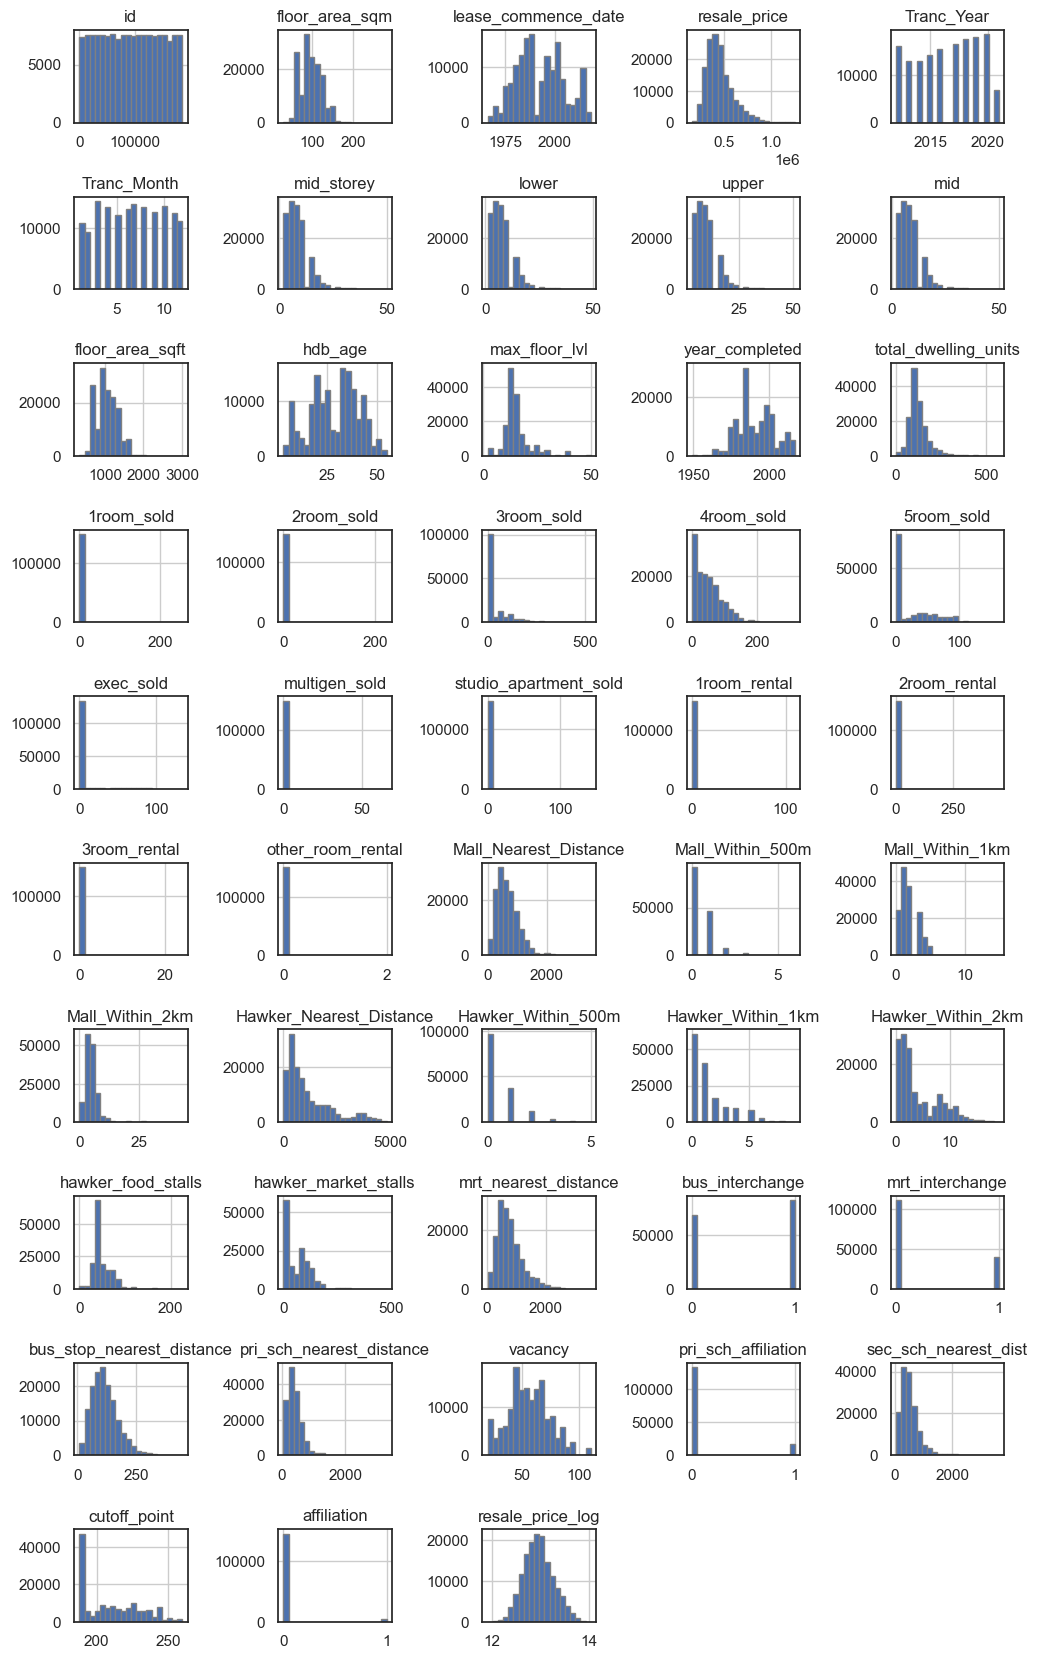

In [247]:
# Examining distributions of remaining numerical variables

housing_num = housing.select_dtypes("number")
housing_num.hist(bins=20, figsize=(12, 25), edgecolor="gray", layout=(12, 5))
plt.subplots_adjust(hspace=0.8, wspace=0.8)


Several variables have a high number of zeros, indicating potentially sparse distributions that may be difficult to approximate to a normal distribution required for linear regression models. Some of the variables above should also be of a different type: bus and mrt interchange might be better as categorical variables.

In [248]:
# Changing type of mrt and bus interchange to categorical since they're essentially boolean

housing['bus_interchange'] = housing['bus_interchange'].astype('object')
housing['mrt_interchange'] = housing['mrt_interchange'].astype('object')

In [249]:
# Checking variables for potential sparsity by seeing which columns have the high percentage of 0s

print('cols')
col_sparsity = housing[housing == 0].count(axis=0)/len(housing.index)
print(col_sparsity[col_sparsity >0])

cols
1room_sold               0.999453
2room_sold               0.958533
3room_sold               0.635520
4room_sold               0.202630
5room_sold               0.416628
exec_sold                0.826328
multigen_sold            0.999486
studio_apartment_sold    0.990868
1room_rental             0.997991
2room_rental             0.987564
3room_rental             0.974453
other_room_rental        0.999786
Mall_Nearest_Distance    0.000200
Mall_Within_500m         0.613865
Mall_Within_1km          0.164193
Mall_Within_2km          0.007416
Hawker_Within_500m       0.645386
Hawker_Within_1km        0.402643
Hawker_Within_2km        0.191689
hawker_food_stalls       0.007530
hawker_market_stalls     0.378966
bus_interchange          0.454905
mrt_interchange          0.738547
pri_sch_affiliation      0.886813
affiliation              0.968065
dtype: float64


### Dropping variables due to data sparsity

In [250]:
# dropping affiliation and pri_sch_affiliation due to sparsity of data (more than 80% missing)

housing.drop(columns = ['affiliation', 'pri_sch_affiliation'], inplace = True)

In [ ]:
# Dropping rental columns due to sparsity of data

housing.drop(columns = ['1room_rental','2room_rental', '3room_rental', 'other_room_rental'], 
             inplace = True)

### Examining variables relating to rooms sold

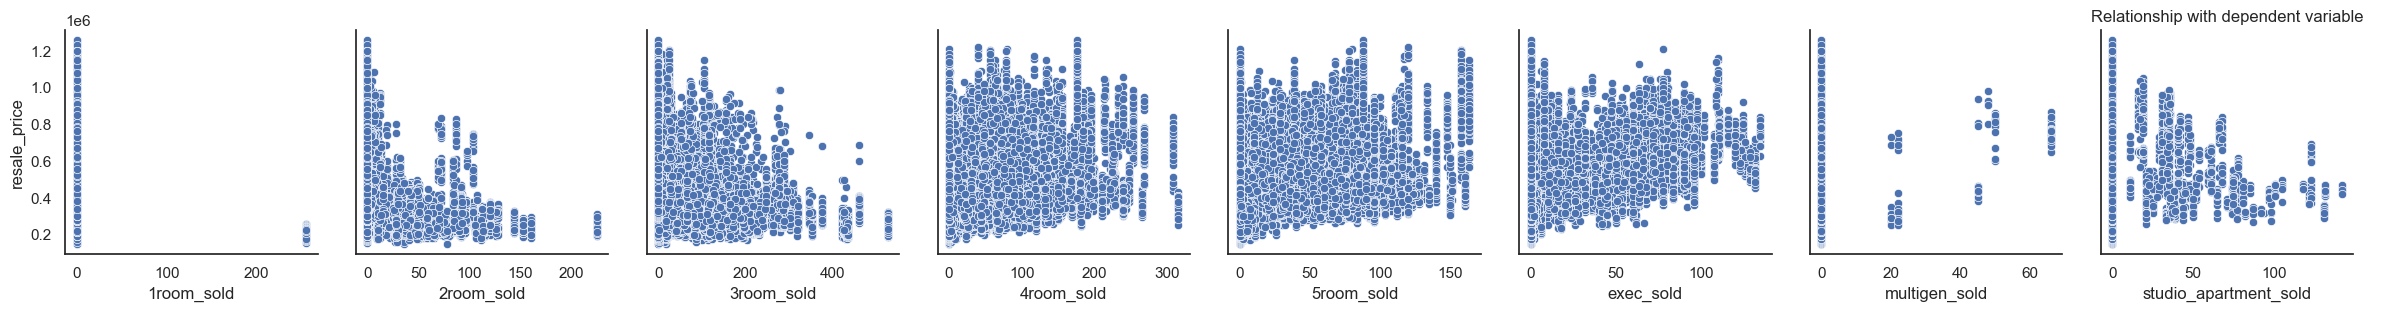

In [251]:
# Scatterplots to see relationship with resale price

g = sns.PairGrid(housing, y_vars='resale_price',
                 x_vars= ['1room_sold', '2room_sold','3room_sold', 
                          '4room_sold', '5room_sold', 'exec_sold',
                          'multigen_sold','studio_apartment_sold'], height=3, aspect=1)
g.map(sns.scatterplot)

plt.title('Relationship with dependent variable', fontsize=12)
g.add_legend()


Most of the variables for number of rooms sold are very sparse, with a high number of 0s, other than 4-room and 5-room units. We will try combining some of these variables and look at their relationship with resale price. 

In [252]:
housing['1_2_3_rooms_sold'] = housing['1room_sold'] + housing['2room_sold'] + housing['3room_sold']
housing['4_5_rooms_sold'] = housing['4room_sold'] + housing['5room_sold']
housing['Other_rooms_sold'] = housing['exec_sold'] + housing['multigen_sold'] + housing['studio_apartment_sold']

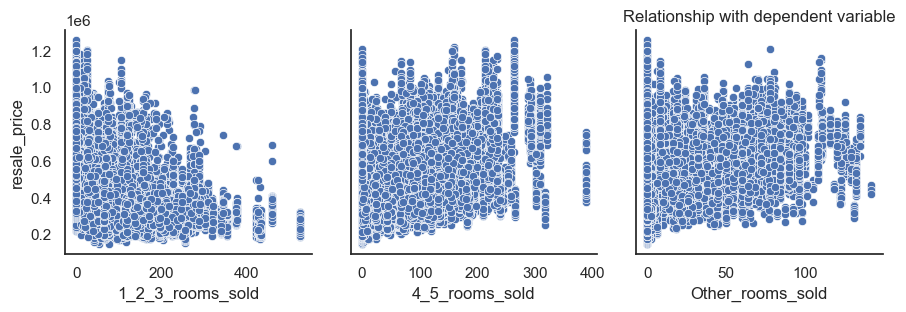

In [253]:
# Scatterplots to see relationship with resale price

g = sns.PairGrid(housing, y_vars='resale_price',
                 x_vars= ['1_2_3_rooms_sold', '4_5_rooms_sold','Other_rooms_sold'], 
                 height=3, aspect=1)

g.map(sns.scatterplot)

plt.title('Relationship with dependent variable', fontsize=12)
g.add_legend()


In [254]:
# We will drop these columns from analysis 

housing.drop(columns = ['1room_sold', '2room_sold','3room_sold', '4room_sold', '5room_sold', 'exec_sold', 
                        'multigen_sold','studio_apartment_sold'], inplace = True)

### Examining variables relating to distance from malls

In [256]:
# Looking at Mall distance variables

housing[['Mall_Nearest_Distance', 'Mall_Within_500m', 'Mall_Within_1km','Mall_Within_2km']].head()

Mall_Nearest_Distance  Mall_Within_500m  Mall_Within_1km  Mall_Within_2km
0            1094.090418               0.0              0.0              7.0
1             866.941448               0.0              1.0              3.0
2            1459.579948               0.0              0.0              4.0
3             950.175199               0.0              1.0              4.0
4             729.771895               0.0              1.0              2.0

In [257]:
# Checking for correlation between mall distance features

housing.loc[:,['Mall_Nearest_Distance', 'Mall_Within_500m', 'Mall_Within_1km','Mall_Within_2km', 'resale_price']].corr()

Mall_Nearest_Distance  Mall_Within_500m  \
Mall_Nearest_Distance               1.000000         -0.627894   
Mall_Within_500m                   -0.627894          1.000000   
Mall_Within_1km                    -0.582816          0.513103   
Mall_Within_2km                    -0.182703          0.212128   
resale_price                       -0.087096          0.087891   

                       Mall_Within_1km  Mall_Within_2km  resale_price  
Mall_Nearest_Distance        -0.582816        -0.182703     -0.087096  
Mall_Within_500m              0.513103         0.212128      0.087891  
Mall_Within_1km               1.000000         0.436249      0.083842  
Mall_Within_2km               0.436249         1.000000      0.114916  
resale_price                  0.083842         0.114916      1.000000

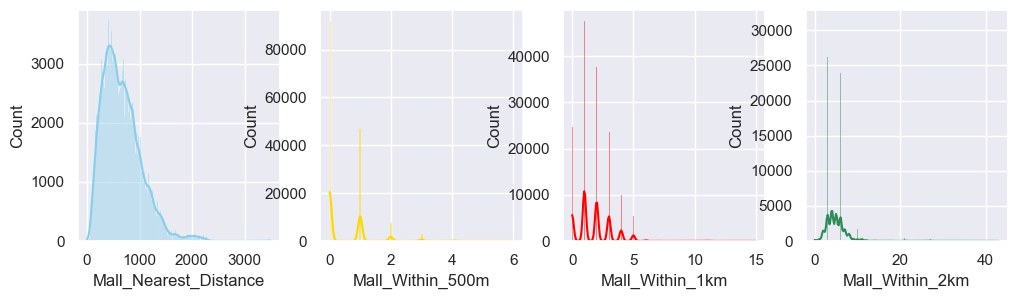

In [258]:
# Looking at the mall distance variables' distributions

sns.set(style="darkgrid")
fig, axs = plt.subplots(1, 4, figsize=(12, 3))
df = housing
 
sns.histplot(data=df, x="Mall_Nearest_Distance", kde=True, color="skyblue", ax=axs[0])
sns.histplot(data=df, x="Mall_Within_500m", kde=True, color="gold", ax=axs[1])
sns.histplot(data=df, x="Mall_Within_1km", kde=True, color="red", ax=axs[2])
sns.histplot(data=df, x="Mall_Within_2km", kde=True, color="seagreen", ax=axs[3])

plt.show()

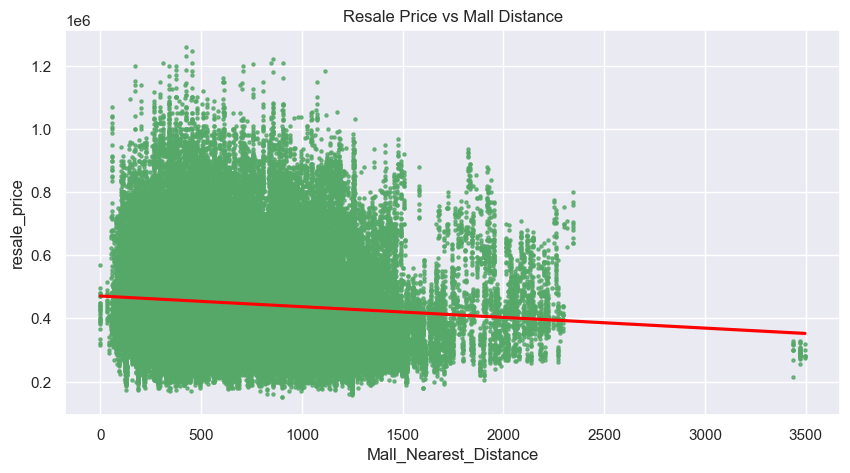

In [259]:
# Relationship between resale price and unit's distance from a mall

fig, ax = plt.subplots(figsize=(10,5))

sns.regplot(x="Mall_Nearest_Distance", y="resale_price", data=housing,
           scatter_kws={"color": "g", 's':5}, line_kws={"color": "red"})
ax.set_title('Resale Price vs Mall Distance');

Distance from a mall seems inversely correlated with resale price, so we will keep this variable.
Since 'Mall_Within_500m' and  'Mall_Within_1km' are both highly correlated with 'Mall_Within_2km', and the last one is best correlated with the dependent variable, we will drop the first 2 and just use Mall within 2km to see if the number of malls within a 2km radius impacts resale price.

In [260]:
housing.drop(columns = ['Mall_Within_500m', 'Mall_Within_1km'], inplace = True)

### Examining variables relating to distance from hawkers¶

In [261]:
# Checking for correlation between hawker distance features

housing.loc[:,['Hawker_Nearest_Distance', 'Hawker_Within_500m','Hawker_Within_1km', 'Hawker_Within_2km', 'resale_price']].corr()

Hawker_Nearest_Distance  Hawker_Within_500m  \
Hawker_Nearest_Distance                 1.000000           -0.529531   
Hawker_Within_500m                     -0.529531            1.000000   
Hawker_Within_1km                      -0.605385            0.756713   
Hawker_Within_2km                      -0.595827            0.639865   
resale_price                           -0.016078            0.013037   

                         Hawker_Within_1km  Hawker_Within_2km  resale_price  
Hawker_Nearest_Distance          -0.605385          -0.595827     -0.016078  
Hawker_Within_500m                0.756713           0.639865      0.013037  
Hawker_Within_1km                 1.000000           0.830123      0.090727  
Hawker_Within_2km                 0.830123           1.000000      0.182935  
resale_price                      0.090727           0.182935      1.000000

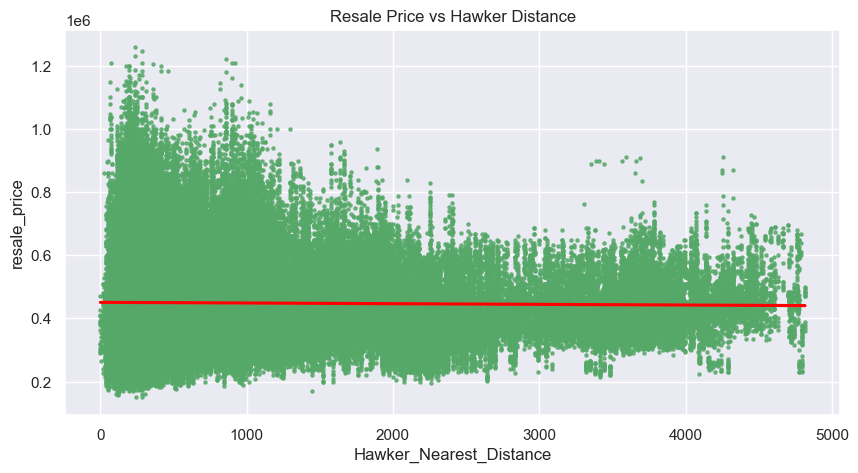

In [262]:
# Examining relationship between resale price and unit's distance from hawkers

fig, ax = plt.subplots(figsize=(10,5))

sns.regplot(x="Hawker_Nearest_Distance", y="resale_price", data=housing,
           scatter_kws={"color": "g", 's':5}, line_kws={"color": "red"})
ax.set_title('Resale Price vs Hawker Distance');

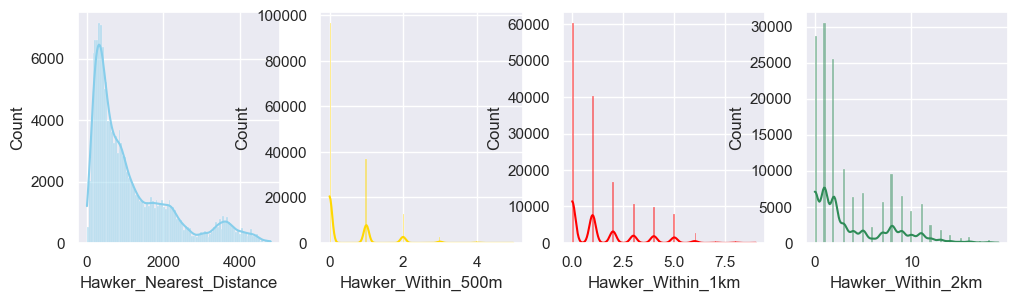

In [263]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(1, 4, figsize=(12, 3))
df = housing
 
sns.histplot(data=df, x="Hawker_Nearest_Distance", kde=True, color="skyblue", ax=axs[0])
sns.histplot(data=df, x="Hawker_Within_500m", kde=True, color="gold", ax=axs[1])
sns.histplot(data=df, x="Hawker_Within_1km", kde=True, color="red", ax=axs[2])
sns.histplot(data=df, x="Hawker_Within_2km", kde=True, color="seagreen", ax=axs[3])

plt.show()

In [264]:
# Will do the same for hawkers 

housing.drop(columns = ['Hawker_Within_500m', 'Hawker_Within_1km'], inplace = True)

### Examining variables relating to unit size and amenities

In [265]:
# Looking at variables relating to unit size and profile

housing[['storey_range','floor_area_sqm', 'lease_commence_date', 'mid_storey', 
         'lower', 'upper', 'mid','floor_area_sqft', 'hdb_age','max_floor_lvl', 
         'year_completed', 'commercial', 'market_hawker','multistorey_carpark',
         'precinct_pavilion', 'Tranc_YearMonth', 'Tranc_Year', 'Tranc_Month']].head()

storey_range  floor_area_sqm  lease_commence_date  mid_storey  lower  upper  \
0     10 TO 12            90.0                 2006          11     10     12   
1     07 TO 09           130.0                 1987           8      7      9   
2     13 TO 15           144.0                 1997          14     13     15   
3     01 TO 05           103.0                 1992           3      1      5   
4     01 TO 03            83.0                 1987           2      1      3   

   mid  floor_area_sqft  hdb_age  max_floor_lvl  year_completed commercial  \
0   11          968.760       15             25            2005          N   
1    8         1399.320       34              9            1987          N   
2   14         1550.016       24             16            1996          N   
3    3         1108.692       29             11            1990          Y   
4    2          893.412       34              4            1987          N   

  market_hawker multistorey_carpark precinct_pavilion Tranc_YearMonth  \
0             N                   N                 N         2016-05   
1             N                   N                 N         2012-07   
2             N                   N                 N         2013-07   
3             N                   N                 N         2012-04   
4             N                   N                 N         2017-12   

   Tranc_Year  Tranc_Month  
0        2016            5  
1        2012            7  
2        2013            7  
3        2012            4  
4        2017           12

In [266]:
# replace all storey-related variables with mid-storey as the estimated median height  and keeping max floor level

housing['est_floor_level'] = housing['mid_storey'] 
housing.drop(columns = ['storey_range', 'lower','upper', 'mid','mid_storey'], inplace = True)

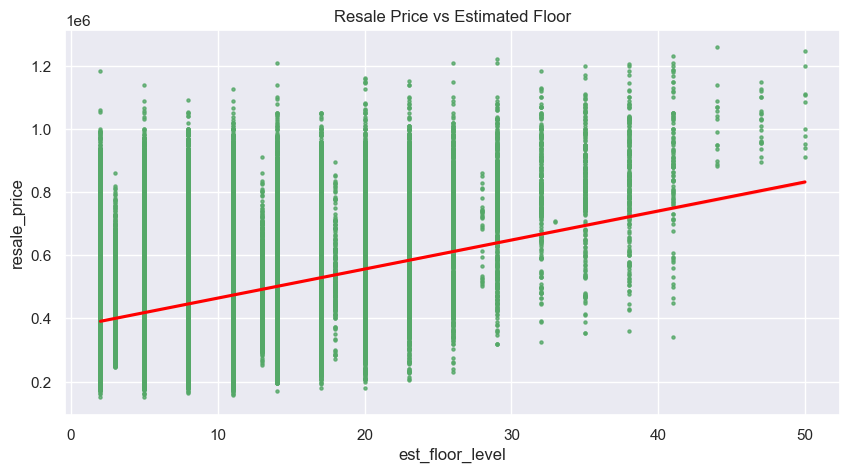

In [267]:
# Examining relationship between resale price and unit's estimated floor level

fig, ax = plt.subplots(figsize=(10,5))

sns.regplot(x="est_floor_level", y="resale_price", data=housing,
           scatter_kws={"color": "g", 's':5}, line_kws={"color": "red"})
ax.set_title('Resale Price vs Estimated Floor');

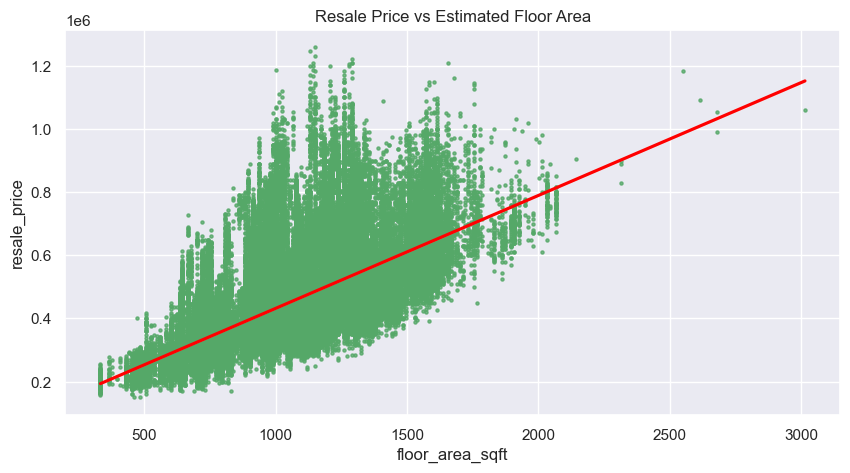

In [268]:
# Examining relationship between resale price and unit's floor area

fig, ax = plt.subplots(figsize=(10,5))

sns.regplot(x="floor_area_sqft", y="resale_price", data=housing,
           scatter_kws={"color": "g", 's':5}, line_kws={"color": "red"})
ax.set_title('Resale Price vs Estimated Floor Area');

In [269]:
# to use floor_area_sqft instead of floor_area_sqm for size

housing.drop(columns = 'floor_area_sqm', inplace = True)

In [270]:
# Creating a new variable to estimate age of unit at the point of transaction 
# Existing time-related variables are less relevant because they look at absolute age of the unit
# Dropping the other variables 

housing['age_at_sale'] = housing['Tranc_Year'] - housing['lease_commence_date']

housing.drop(columns = 
             ['hdb_age','year_completed','Tranc_YearMonth','lease_commence_date'], 
             inplace = True)

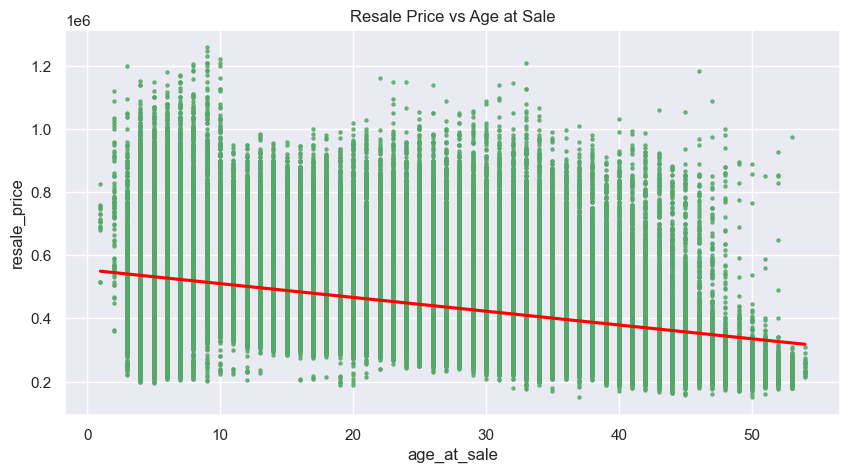

In [271]:
# Examining relationship between resale price and unit's floor area

fig, ax = plt.subplots(figsize=(10,5))

sns.regplot(x="age_at_sale", y="resale_price", data=housing,
           scatter_kws={"color": "g", 's':5}, line_kws={"color": "red"})
ax.set_title('Resale Price vs Age at Sale');

Clear downward trend on resale price with each unit increase in age at the point of transaction.

### Examining variables relating to schools

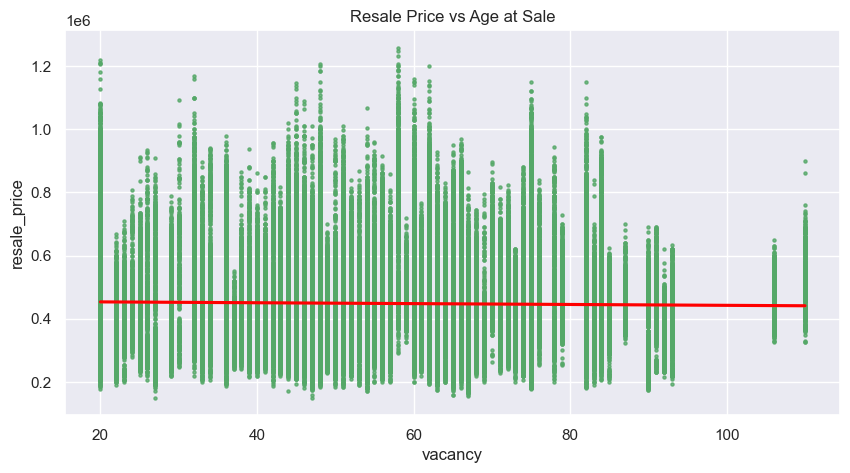

In [273]:
# Examining relationship between resale price and number of pri sch vacancies

fig, ax = plt.subplots(figsize=(10,5))

sns.regplot(x="vacancy", y="resale_price", data=housing,
           scatter_kws={"color": "g", 's':5}, line_kws={"color": "red"})
ax.set_title('Resale Price vs Age at Sale');

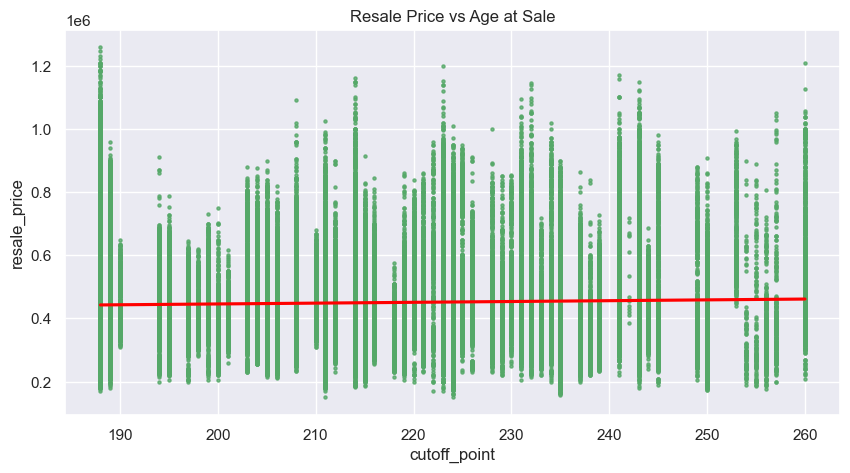

In [274]:
# Examining relationship between resale price and cut-off point

fig, ax = plt.subplots(figsize=(10,5))

sns.regplot(x="cutoff_point", y="resale_price", data=housing,
           scatter_kws={"color": "g", 's':5}, line_kws={"color": "red"})
ax.set_title('Resale Price vs Age at Sale');

In [275]:
# To drop both variables given that resale price seems unaffected by either

housing.drop(columns = ['cutoff_point', 'vacancy'], inplace = True)

### Normalising the distributions of remaining variables

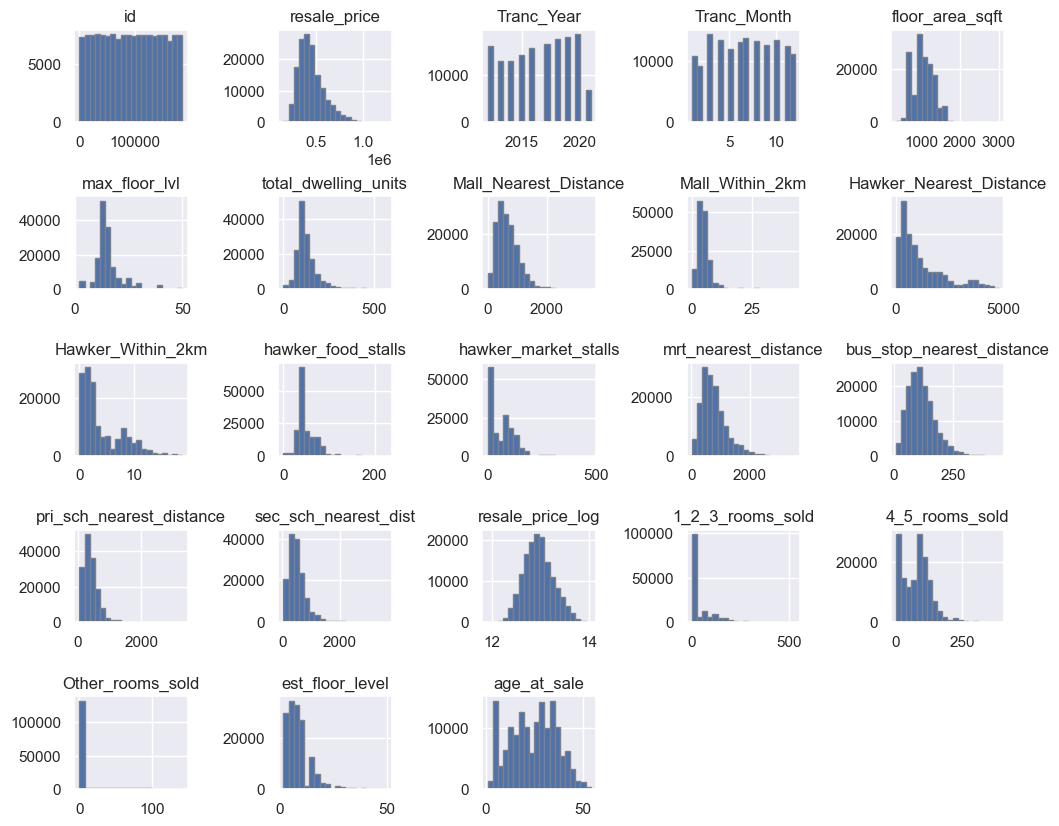

In [276]:
# Re-examining the distributions of remaining numerical variables

housing_num = housing.select_dtypes("number")
housing_num.hist(bins=20, figsize=(12, 25), edgecolor="gray", layout=(12, 5))
plt.subplots_adjust(hspace=0.8, wspace=0.8)


In [278]:
housing.drop(columns = 'id', inplace = True)

Some of the distance-related variables appeared to be right skewed with lower counts in the extremely high values. Let's look at the distributions again.

In [ ]:
# Histogram set 3 for distances without log

sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 3, figsize=(17, 8))
df = housing
 
sns.histplot(data=df, x="Mall_Nearest_Distance", kde=True, color="sandybrown", ax=axs[0, 0])
sns.histplot(data=df, x="Hawker_Nearest_Distance", kde=True, color="forestgreen", ax=axs[0, 1])
sns.histplot(data=df, x="mrt_nearest_distance", kde=True, color="slategrey", ax=axs[0,2])
sns.histplot(data=df, x="bus_stop_nearest_distance", kde=True, color="darkorchid", ax=axs[1,0])
sns.histplot(data=df, x="pri_sch_nearest_distance", kde=True, color="salmon", ax=axs[1,1])
sns.histplot(data=df, x="sec_sch_nearest_dist", kde=True, color="indianred", ax=axs[1,2])


plt.show()


In [ ]:
# to log all variables with large scales, but first replace 0 with 1 for "Mall_Nearest_Distance"

housing["Mall_Nearest_Distance"].replace({0:1}, inplace = True)

In [ ]:
# housing["Mall_Nearest_Distance_log"] = np.log(housing["Mall_Nearest_Distance"])
# housing["Hawker_Nearest_Distance_log"] = np.log(housing["Hawker_Nearest_Distance"])
# housing["mrt_nearest_distance_log"] = np.log(housing["mrt_nearest_distance"])
# housing["bus_stop_nearest_distance_log"] = np.log(housing["bus_stop_nearest_distance"])
# housing["pri_sch_nearest_distance_log"] = np.log(housing["pri_sch_nearest_distance"])
# housing["sec_sch_nearest_dist_log"] = np.log(housing["sec_sch_nearest_dist"])

In [ ]:
# Reviewing changes after the log transformation

# sns.set(style="darkgrid")
# fig, axs = plt.subplots(2, 3, figsize=(17, 8))
# df = housing
 
# sns.histplot(data=df, x="Mall_Nearest_Distance_log", kde=True, color="sandybrown", ax=axs[0, 0])
# sns.histplot(data=df, x="Hawker_Nearest_Distance_log", kde=True, color="forestgreen", ax=axs[0, 1])
# sns.histplot(data=df, x="mrt_nearest_distance_log", kde=True, color="slategrey", ax=axs[0,2])
# sns.histplot(data=df, x="bus_stop_nearest_distance_log", kde=True, color="darkorchid", ax=axs[1,0])
# sns.histplot(data=df, x="pri_sch_nearest_distance_log", kde=True, color="salmon", ax=axs[1,1])
# sns.histplot(data=df, x="sec_sch_nearest_dist_log", kde=True, color="indianred", ax=axs[1,2])

# plt.show()


In [ ]:
# Drop original variables above

# housing.drop(columns = ["id","floor_area_sqft", "Mall_Nearest_Distance",
                       "Hawker_Nearest_Distance", "mrt_nearest_distance", 
                       "bus_stop_nearest_distance", "pri_sch_nearest_distance",
                       "sec_sch_nearest_dist"], inplace = True)

### Looking at Categorical variables

#### a) Flat Types

In [62]:
# Looking at flat type columns, which seem similar...

housing[['flat_model', 'full_flat_type', 'flat_type']].head()

flat_model       full_flat_type  flat_type
0     Model A       4 ROOM Model A     4 ROOM
1    Improved      5 ROOM Improved     5 ROOM
2   Apartment  EXECUTIVE Apartment  EXECUTIVE
3     Model A       4 ROOM Model A     4 ROOM
4  Simplified    4 ROOM Simplified     4 ROOM

In [63]:
housing.groupby('flat_model')['resale_price'].median().sort_values(ascending = False)

flat_model
Type S2                   1000000.0
Type S1                    900000.0
Premium Apartment Loft     879000.0
Terrace                    815000.0
Multi Generation           765500.0
DBSS                       745000.0
Premium Maisonette         735000.0
Model A-Maisonette         700000.0
Adjoined flat              690500.0
Improved-Maisonette        670000.0
Maisonette                 652000.0
Apartment                  605000.0
Premium Apartment          465000.0
Improved                   450000.0
Model A                    412000.0
Model A2                   365000.0
Simplified                 350000.0
New Generation             340294.0
Standard                   328000.0
2-room                     245000.0
Name: resale_price, dtype: float64

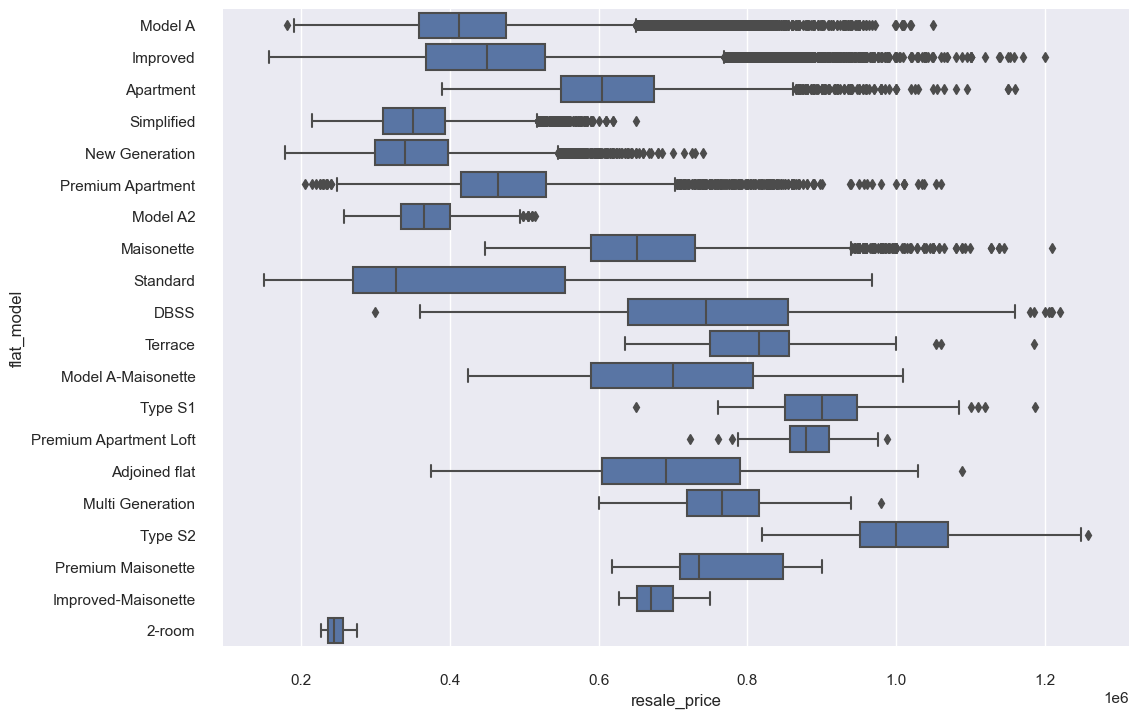

In [64]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.boxplot(y="flat_model", x="resale_price",
            palette=["b"],
            data=housing)

sns.despine(offset=10, trim=True)


In [65]:
housing.groupby('full_flat_type')['resale_price'].mean().sort_values(ascending = False)

full_flat_type
5 ROOM Type S2                       1.019220e+06
4 ROOM Type S1                       9.050422e+05
4 ROOM Premium Apartment Loft        8.900216e+05
4 ROOM Terrace                       8.898889e+05
5 ROOM Premium Apartment Loft        8.483269e+05
5 ROOM DBSS                          8.387412e+05
3 ROOM Terrace                       8.108271e+05
MULTI-GENERATION Multi Generation    7.679920e+05
EXECUTIVE Premium Maisonette         7.605333e+05
EXECUTIVE Adjoined flat              7.587183e+05
5 ROOM Model A-Maisonette            6.978675e+05
4 ROOM DBSS                          6.958592e+05
5 ROOM Improved-Maisonette           6.775731e+05
EXECUTIVE Maisonette                 6.743608e+05
5 ROOM Adjoined flat                 6.679009e+05
EXECUTIVE Apartment                  6.203168e+05
5 ROOM Standard                      6.189874e+05
4 ROOM Adjoined flat                 6.090370e+05
EXECUTIVE Premium Apartment          5.591411e+05
5 ROOM Model A                     

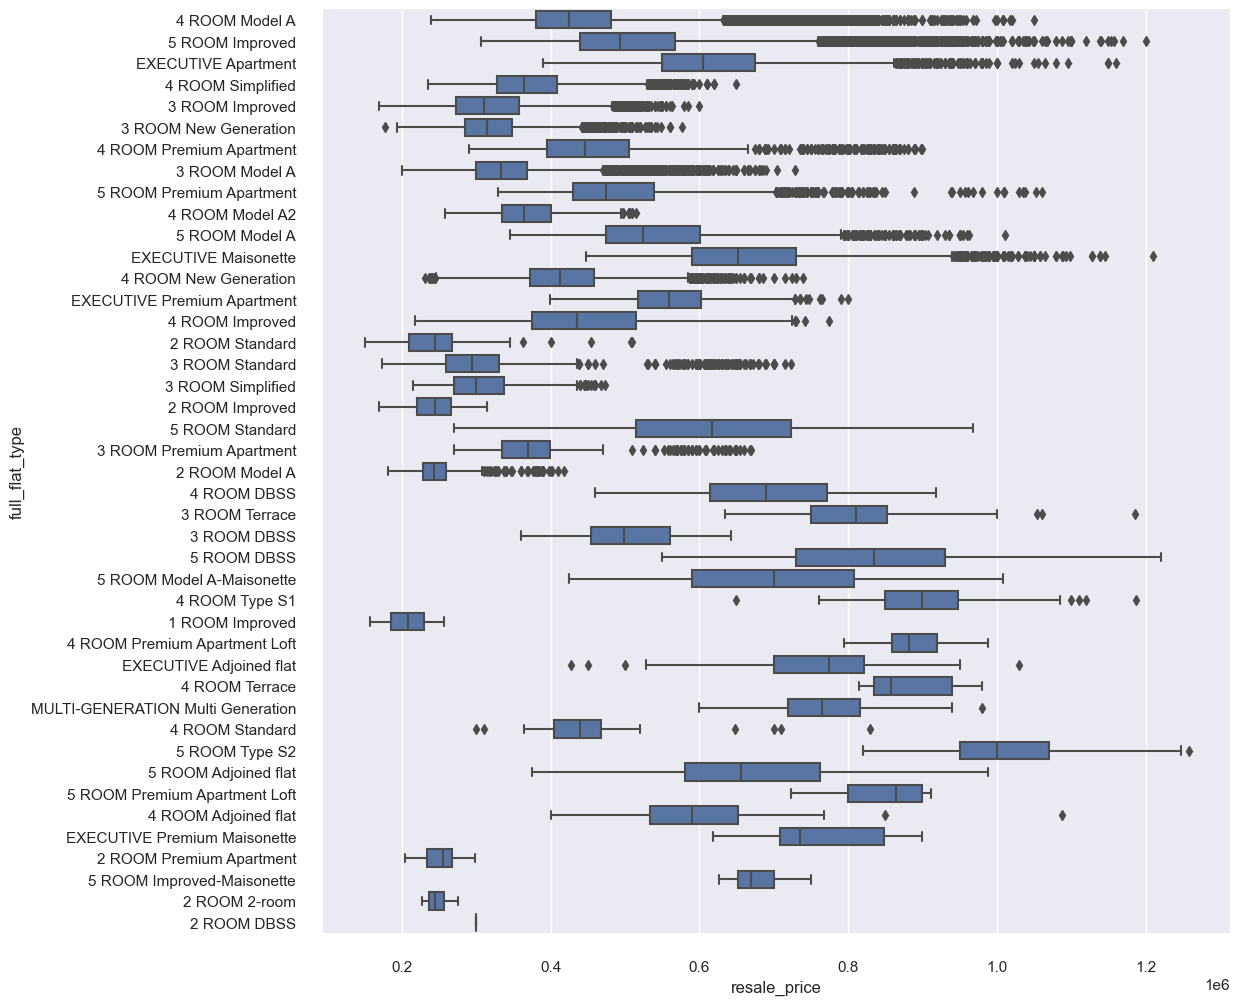

In [66]:
sns.set(rc={'figure.figsize':(11.7,12)})

sns.boxplot(y="full_flat_type", x="resale_price",
            palette=["b"],
            data=housing)
sns.despine(offset=10, trim=True)


In [67]:
housing.groupby('flat_type')['resale_price'].mean().sort_values(ascending = False)

flat_type
MULTI-GENERATION    767992.000000
EXECUTIVE           633933.020306
5 ROOM              536760.130100
4 ROOM              444244.851671
3 ROOM              326326.800662
2 ROOM              245532.248543
1 ROOM              207015.463415
Name: resale_price, dtype: float64

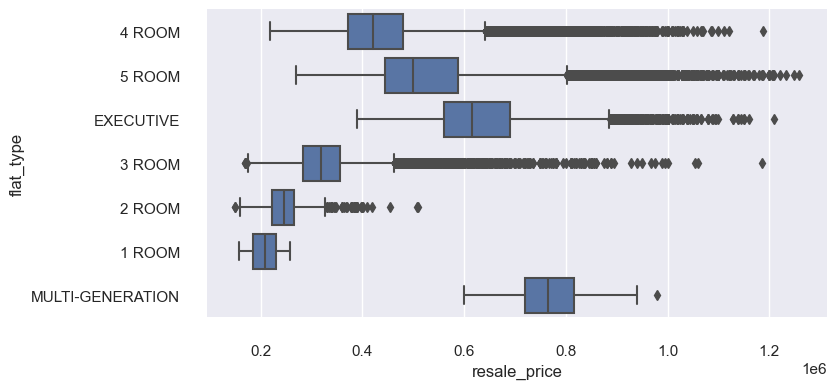

In [68]:
sns.set(rc={'figure.figsize':(8,4)})

sns.boxplot(y="flat_type", x="resale_price",
            palette=["b"],
            data=housing)
sns.despine(offset=10, trim=True)


We will drop full_flat_type due to its high granularity as a categorical variable (which would create a large number of dummy variables). To use flat_model and flat_type instead 

In [69]:
# Dropping full flat type

housing.drop(columns = ['full_flat_type'], inplace = True)

#### b) Location and address

In [70]:
# Looking at all the categorical location-type columns... 

housing[['town', 'street_name', 'block', 'address', 'planning_area', 'mrt_name', 'bus_stop_name']].head()

town       street_name block               address  \
0  KALLANG/WHAMPOA  UPP BOON KENG RD    3B  3B, UPP BOON KENG RD   
1           BISHAN      BISHAN ST 13   153     153, BISHAN ST 13   
2      BUKIT BATOK    BT BATOK ST 25  289B  289B, BT BATOK ST 25   
3           BISHAN      BISHAN ST 22   232     232, BISHAN ST 22   
4           YISHUN      YISHUN ST 81   876     876, YISHUN ST 81   

  planning_area     mrt_name             bus_stop_name  
0       Kallang      Kallang                    Blk 3B  
1        Bishan       Bishan              BLK 151A MKT  
2   Bukit Batok  Bukit Batok                  Blk 289E  
3        Bishan       Bishan  Opp Bishan Nth Shop Mall  
4        Yishun       Khatib                   Blk 873

In [71]:
# Calculating the average resale price by mrt station

mrt_mean_price = housing.groupby('mrt_name')['resale_price'].mean().sort_values(ascending = False)

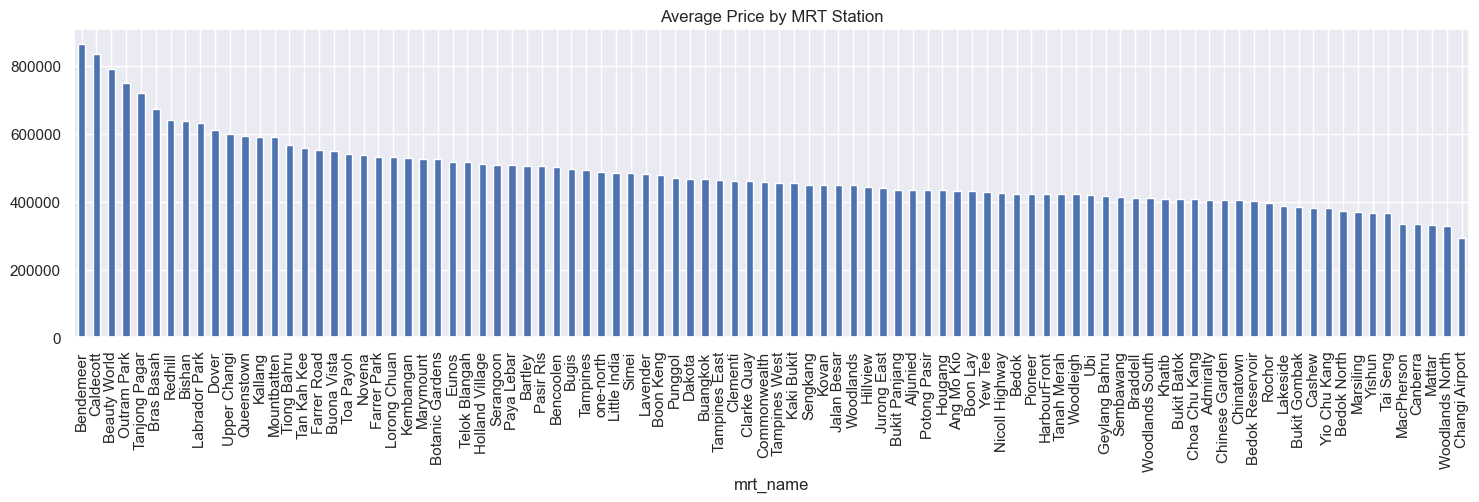

In [72]:
# Visualising the mean resale price by mrt station

mrt_mean_price.plot.bar(figsize=(18,4)).set(title='Average Price by MRT Station')
plt.show()

There are over 1.6k possible values in bus_stop_name. Creates too many dimensions with limited info (alot of 0s and a single 1 per column) We will drop this from the model. 

In [73]:
bus_stop_resale = housing.groupby('bus_stop_name')['resale_price'].mean().sort_values(ascending = False)
bus_stop_resale.head()

bus_stop_name
Opp Blk 317                1.026444e+06
Bef The Pinnacle@Duxton    9.625007e+05
Pei Hwa Presby Pr Sch      9.339235e+05
Queenstown Polyclinic      9.186667e+05
Blk 101C CP                8.906057e+05
Name: resale_price, dtype: float64

In [77]:
# Drop town, street name, address, mrt_name, to use 'planning_area' for location
# To also drop bus_stop_name due to granularity issues - too many small counts

housing.drop(columns = ['town', 'street_name', 'block', 'address', 'mrt_name','bus_stop_name'], inplace = True)

In [78]:
# Bus interchange on resale price

housing.groupby('bus_interchange')['resale_price'].mean()

bus_interchange
0    448148.348539
1    449090.781403
Name: resale_price, dtype: float64

The presence of a bus interchange doesn't seem to affect resale price much, probably because people just need a nearby bus stop to access a range of possible buses to their destination rather than an interchange. Will drop this variable.

In [79]:
housing.drop(columns = 'bus_interchange', inplace = True)

In [80]:
# Presence of a mrt interchange seems to make more of a difference 
# Likely because MRT interchanges are often at key city centres or hubs and 
# have a suite of amenities built in

housing.groupby('mrt_interchange')['resale_price'].mean()

mrt_interchange
0    443057.620051
1    464493.363509
Name: resale_price, dtype: float64

#### c) Amenities

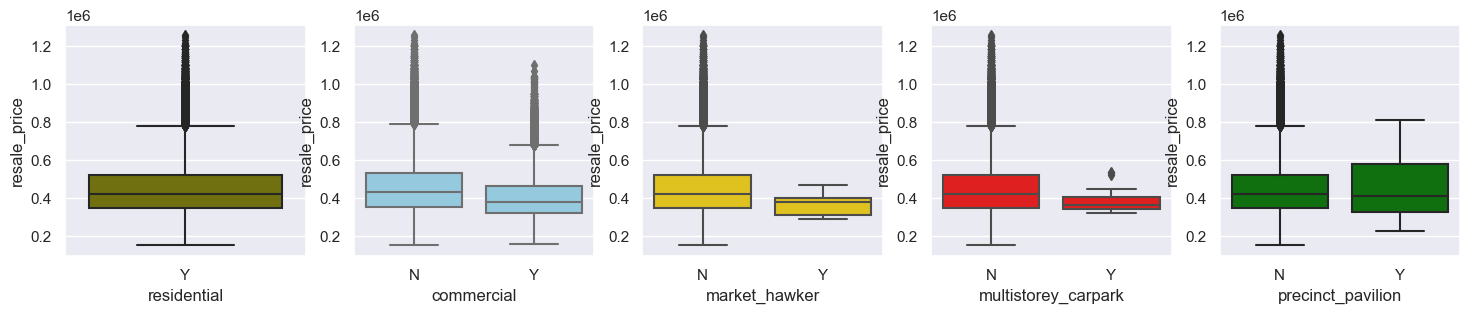

In [81]:
# Looking at amenity-related variables by relationship to resale price

sns.set(style="darkgrid")
fig, axs = plt.subplots(1, 5, figsize=(18, 3))
df = housing

sns.boxplot(data=df, x="residential", y = "resale_price", color="olive", ax=axs[0])
sns.boxplot(data=df, x="commercial", y = "resale_price", color="skyblue", ax=axs[1])
sns.boxplot(data=df, x="market_hawker", y = "resale_price", color="gold", ax=axs[2])
sns.boxplot(data=df, x="multistorey_carpark", y = "resale_price", color="red", ax=axs[3])
sns.boxplot(data=df, x="precinct_pavilion", y = "resale_price", color="green", ax=axs[4])

plt.show()

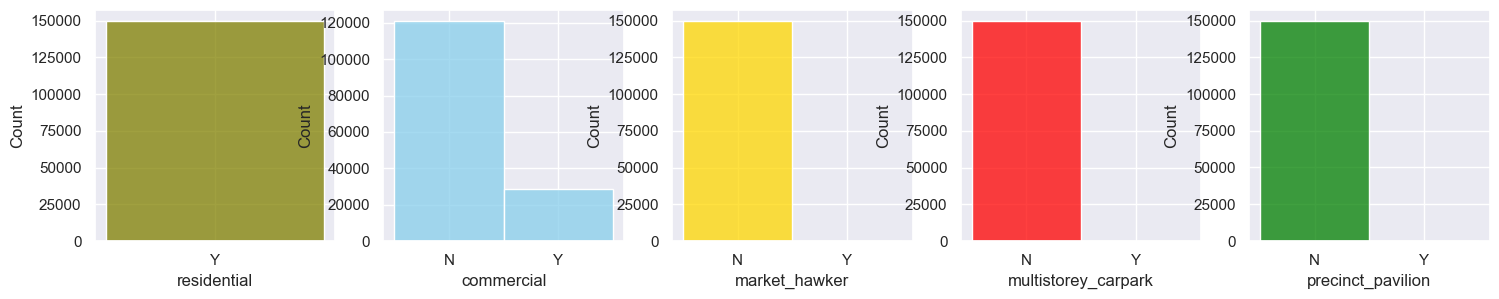

In [82]:
# Looking at amenity-related variables by count

sns.set(style="darkgrid")
fig, axs = plt.subplots(1, 5, figsize=(18, 3))
df = housing

sns.histplot(data=df, x="residential",  color="olive", ax=axs[0])
sns.histplot(data=df, x="commercial",  color="skyblue", ax=axs[1])
sns.histplot(data=df, x="market_hawker",  color="gold", ax=axs[2])
sns.histplot(data=df, x="multistorey_carpark",  color="red", ax=axs[3])
sns.histplot(data=df, x="precinct_pavilion", color="green", ax=axs[4])

plt.show()

In [83]:
housing.residential.value_counts(normalize = True)

Y    1.0
Name: residential, dtype: float64

In [84]:
housing.commercial.value_counts(normalize = True)

N    0.80807
Y    0.19193
Name: commercial, dtype: float64

In [85]:
housing.market_hawker.value_counts(normalize = True)

N    0.9999
Y    0.0001
Name: market_hawker, dtype: float64

In [86]:
housing.multistorey_carpark.value_counts(normalize = True)

N    0.99972
Y    0.00028
Name: multistorey_carpark, dtype: float64

In [87]:
housing.precinct_pavilion.value_counts(normalize = True)

N    0.999246
Y    0.000754
Name: precinct_pavilion, dtype: float64

In [88]:
# Keeping only commercial and dropping the rest due to sparsity of data. 

housing.drop(columns = ['residential','market_hawker','multistorey_carpark', 
                        'precinct_pavilion'], inplace = True)

#### d) Primary and Secondary School variables

In [89]:
# Calculating the average resale price by mrt station

pri_sch_name_mean_price = housing.groupby('pri_sch_name')['resale_price'].mean().sort_values(ascending = False)

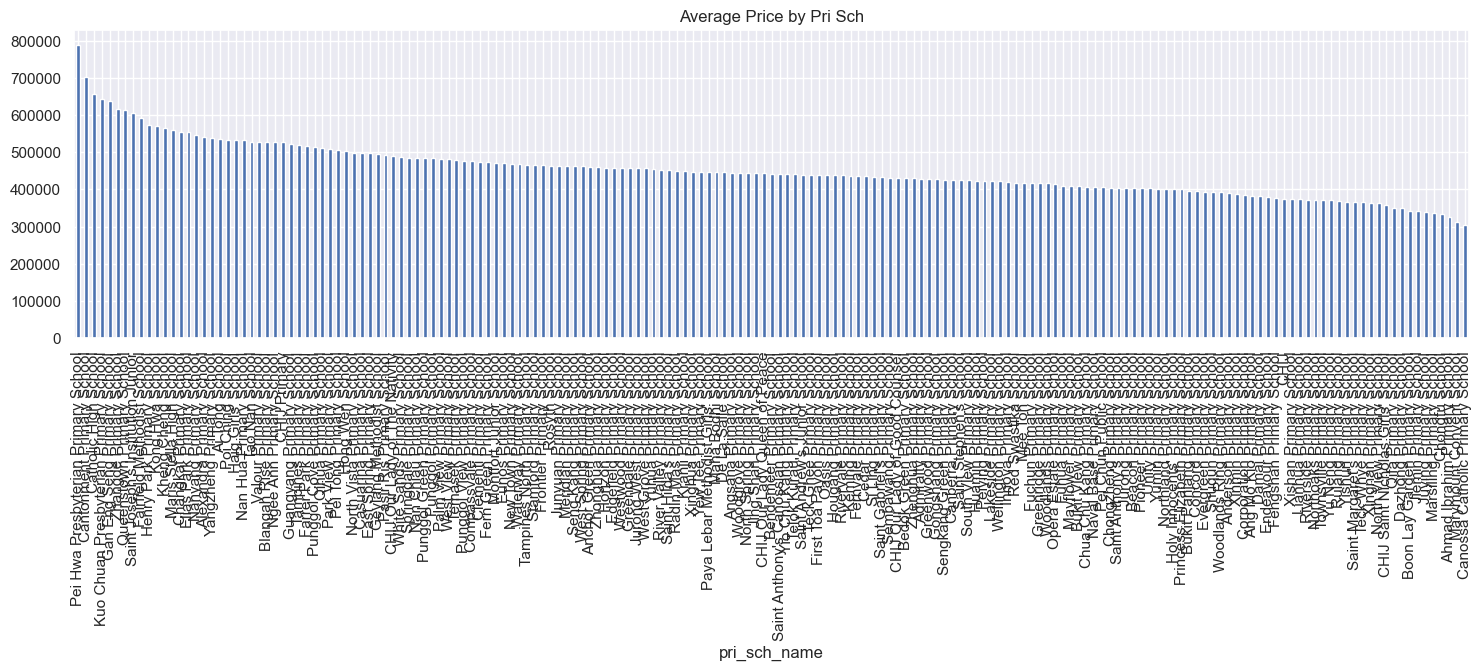

In [90]:
# Visualising the mean resale price by mrt station

pri_sch_name_mean_price.plot.bar(figsize=(18,4)).set(title='Average Price by Pri Sch')
plt.show()

In [91]:
# Calculating the average resale price by mrt station

sec_sch_name_mean_price = housing.groupby('sec_sch_name')['resale_price'].mean().sort_values(ascending = False)

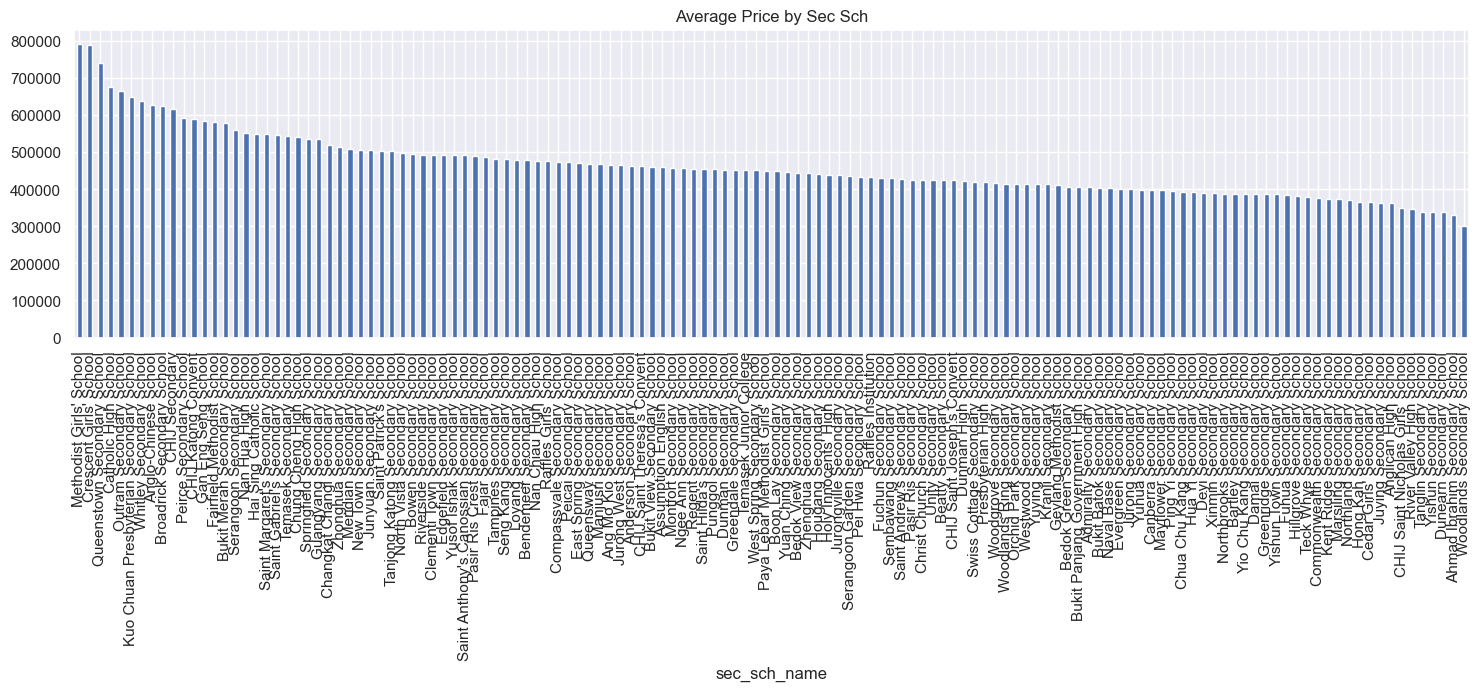

In [92]:
# Visualising the mean resale price by mrt station

sec_sch_name_mean_price.plot.bar(figsize=(18,4)).set(title='Average Price by Sec Sch')
plt.show()

#### e) Transaction Year and Month

We'll be converting the following variables to categorical since we're interested to see which year or month might have higher/lower resale prices not looking at longitudinal trends over time, whereby we would convert to datetime type instead.

In [93]:
# Converting transaction year and month to categorical variables

housing['Tranc_Year'] = housing['Tranc_Year'].astype('object')
housing['Tranc_Month'] = housing['Tranc_Month'].astype('object')

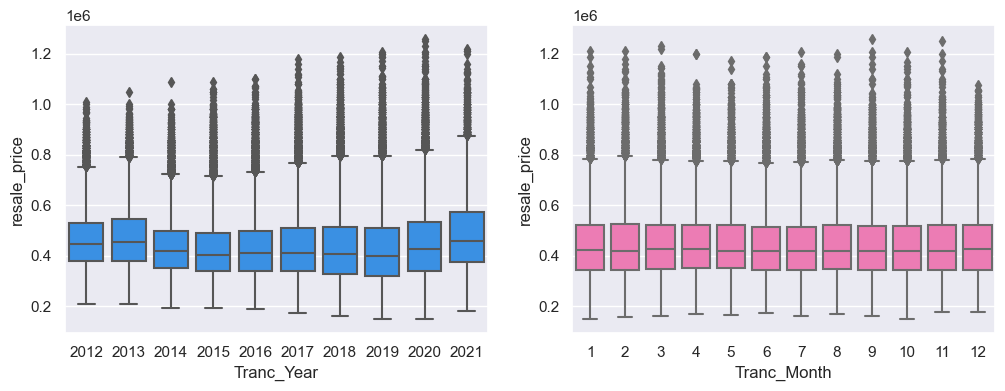

In [94]:
# Looking at the year and month distributions

sns.set(style="darkgrid")
fig, axs = plt.subplots(1, 2, figsize=(12,4))
df = housing

sns.boxplot(data=df, x="Tranc_Year", y = "resale_price", color="dodgerblue", ax=axs[0])
sns.boxplot(data=df, x="Tranc_Month", y = "resale_price", color="hotpink", ax=axs[1])

plt.show()

Looks like the year of transaction has some impact on resale price, while there are minimal differences by month. We will drop transaction month from consideration as a predictor.

In [95]:
# Dropping transaction month as it doesn't have much variation

housing.drop(columns = ['Tranc_Month'], inplace = True)

### Looking at skew and multicollinearity

In [96]:
# Checking for skewness of variables

housing.skew().sort_values(ascending=False).round(2)

/var/folders/r9/9246nqp9249ghjl6r9xy_dwr0000gn/T/ipykernel_28895/3820577826.py:3: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  housing.skew().sort_values(ascending=False).round(2)


Mall_Within_2km                  4.70
Other_rooms_sold                 3.33
1_2_3_rooms_sold                 2.18
total_dwelling_units             2.08
max_floor_lvl                    2.02
hawker_food_stalls               1.61
est_floor_level                  1.54
Hawker_Within_2km                1.14
resale_price                     1.09
mrt_interchange                  1.09
hawker_market_stalls             0.70
4_5_rooms_sold                   0.60
resale_price_log                 0.26
age_at_sale                     -0.04
Tranc_Year                      -0.14
pri_sch_nearest_distance_log    -0.17
sec_sch_nearest_dist_log        -0.18
Hawker_Nearest_Distance_log     -0.21
bus_stop_nearest_distance_log   -0.54
mrt_nearest_distance_log        -0.60
Mall_Nearest_Distance_log       -0.74
dtype: float64

Data is not too skewed for most variables.

In [97]:
# Selecting numerical variables

housing_num = housing.select_dtypes("number")

In [98]:
# Checking for multicollinearity between more than 2 variables using the VIF score

X = housing.select_dtypes("number")
 
#removed: 'id', 'total_dwelling_units', 'cutoff_point', 'price_per_sqft', 
#'floor_area_sqft', 'max_floor_lvl'

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                          feature         VIF
0                    resale_price   35.769397
1                   max_floor_lvl   21.504384
2            total_dwelling_units  136.828617
3                 Mall_Within_2km    3.881792
4               Hawker_Within_2km    5.200475
5              hawker_food_stalls    8.686341
6            hawker_market_stalls    3.111324
7                 mrt_interchange    1.691449
8                resale_price_log  824.471838
9                1_2_3_rooms_sold   49.328117
10                 4_5_rooms_sold   67.800841
11               Other_rooms_sold    4.950257
12                est_floor_level    4.863650
13                    age_at_sale   12.586282
14      Mall_Nearest_Distance_log  130.704457
15    Hawker_Nearest_Distance_log  108.249813
16       mrt_nearest_distance_log  136.951387
17  bus_stop_nearest_distance_log   80.652913
18   pri_sch_nearest_distance_log  115.905381
19       sec_sch_nearest_dist_log  115.600313


Price per sqft, max floor level, cutoff point all have quite high VIF scores, indicating that it's highly correlated with more than 1 variable. Will exclude the log-transformed variables from consideration.

In [99]:
# Dropping the variables involved in improving VIF

housing.drop(columns = 'total_dwelling_units',inplace = True)

/var/folders/r9/9246nqp9249ghjl6r9xy_dwr0000gn/T/ipykernel_28895/1546451160.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = housing.corr()


Text(0.5, 1.0, 'Correlation Heatmap of Variables')

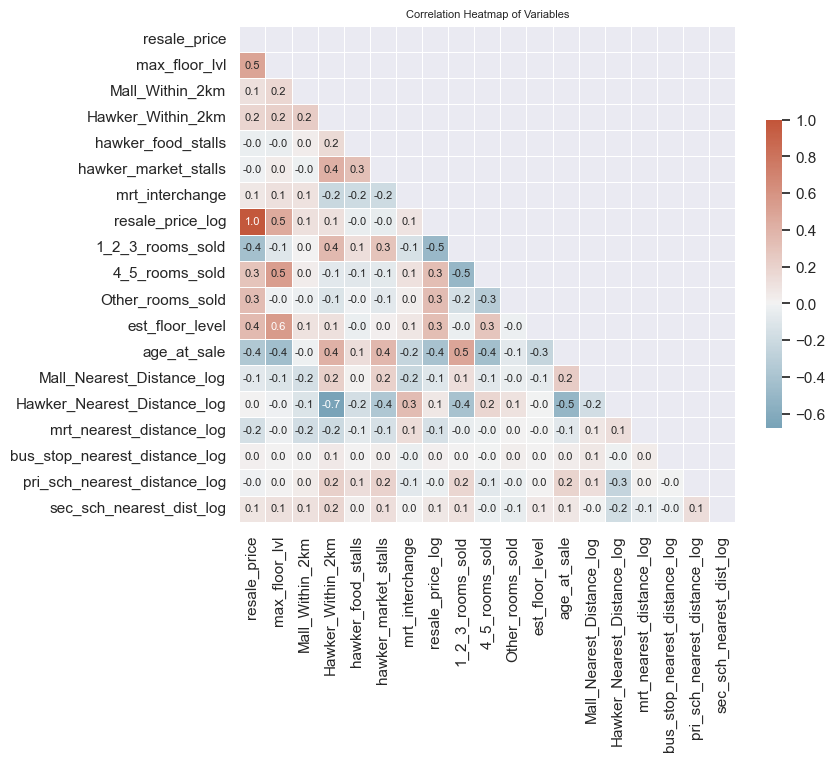

In [100]:
# Looking at the correlation again; most multicollinearity seems to have been resolved

corr = housing.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(8, 8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, fmt = '.1f',
            square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .5}, annot_kws={"size":8})
plt.title('Correlation Heatmap of Variables', fontsize=8)

In [101]:
housing.describe(include = 'all')

flat_type flat_model  resale_price  Tranc_Year  max_floor_lvl  \
count     149805     149805  1.498050e+05    149805.0  149805.000000   
unique         7         20           NaN        10.0            NaN   
top       4 ROOM    Model A           NaN      2020.0            NaN   
freq       60657      45786           NaN     18616.0            NaN   
mean         NaN        NaN  4.486621e+05         NaN      15.107914   
std          NaN        NaN  1.432125e+05         NaN       6.194526   
min          NaN        NaN  1.500000e+05         NaN       2.000000   
25%          NaN        NaN  3.460000e+05         NaN      12.000000   
50%          NaN        NaN  4.200000e+05         NaN      13.000000   
75%          NaN        NaN  5.200000e+05         NaN      16.000000   
max          NaN        NaN  1.258000e+06         NaN      50.000000   

       commercial planning_area  Mall_Within_2km  Hawker_Within_2km  \
count      149805        149805    149805.000000      149805.000000   
unique          2            32              NaN                NaN   
top             N   Jurong West              NaN                NaN   
freq       121053         11445              NaN                NaN   
mean          NaN           NaN         5.197650           3.801242   
std           NaN           NaN         3.469713           4.009217   
min           NaN           NaN         0.000000           0.000000   
25%           NaN           NaN         3.000000           1.000000   
50%           NaN           NaN         5.000000           2.000000   
75%           NaN           NaN         6.000000           7.000000   
max           NaN           NaN        43.000000          19.000000   

        hawker_food_stalls  hawker_market_stalls  mrt_interchange  \
count        149805.000000         149805.000000    149805.000000   
unique                 NaN                   NaN              NaN   
top                    NaN                   NaN              NaN   
freq                   NaN                   NaN              NaN   
mean             48.701746             58.293308         0.261453   
std              19.150471             55.513732         0.439428   
min               0.000000              0.000000         0.000000   
25%              40.000000              0.000000         0.000000   
50%              43.000000             52.000000         0.000000   
75%              60.000000             99.000000         1.000000   
max             226.000000            477.000000         1.000000   

                    pri_sch_name                sec_sch_name  \
count                     149805                      149805   
unique                       177                         134   
top     Marsiling Primary School  Bendemeer Secondary School   
freq                        2071                        3383   
mean                         NaN                         NaN   
std                          NaN                         NaN   
min                          NaN                         NaN   
25%                          NaN                         NaN   
50%                          NaN                         NaN   
75%                          NaN                         NaN   
max                          NaN                         NaN   

        resale_price_log  1_2_3_rooms_sold  4_5_rooms_sold  Other_rooms_sold  \
count      149805.000000     149805.000000   149805.000000     149805.000000   
unique               NaN               NaN             NaN               NaN   
top                  NaN               NaN             NaN               NaN   
freq                 NaN               NaN             NaN               NaN   
mean           12.967287         41.182230       76.231488          6.428644   
std             0.302101         70.615231       54.906728         19.770090   
min            11.918391          0.000000        0.000000          0.000000   
25%            12.754194          0.000000       25

In [102]:
# final dataset for modelling 

housing.shape

(149805, 27)

### Exporting data

In [103]:
# Save as csv file 
housing.to_csv('./housing.csv')  